<a href="https://colab.research.google.com/github/raz0208/Agritech-Pest-Prediction/blob/main/Agritech_Pest_Prediction_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Agritech Pest Prediction and Classification

# Datasets

## Overview
The datasets utilized in this project aim to analyze trends and predict the occurrence of insect pests based on meteorological conditions and past insect captures. Two primary data sources have been considered:
1. **Capture Data**: Records of insect catches over time.
2. **Historical Weather Data**: Meteorological data corresponding to the same period and locations as the capture data.

Both datasets are provided for two different locations: **Cicalino** (two different locations) and **Imola** (three different locations).

## Capture Data
Purpose: Contains historical records of insect catches, used for both regression (predicting the number of insects caught) and classification (detecting new catches).

### Files:
- `Capture_Chart(Cicalino_1).csv`
- `Capture_Chart(Cicalino_2).csv`
- `Capture_Chart(Imola_1).csv`
- `Capture_Chart(Imola_2).csv`
- `Capture_Chart(Imola_3).csv`

### Dataset sructure:
- **DateTime:** Timestamp of capture events.
- **Number of insects:** Count of insects caught.
- **New catches (per event):** Indicator of whether new catches occurred.
- **Reviewed:** Status of data review (e.g., "Si" for reviewed).
- **Event:** Additional event information (mostly empty).

## Historical Weather Data
Purpose: Contains meteorological data, which will be used as features for insect prediction models.

### Files:
- `Historical_Weather_Data(Cicalino_1).csv`
- `Historical_Weather_Data(Cicalino_2).csv`
- `Historical_Weather_Data(Imola_1).csv`
- `Historical_Weather_Data(Imola_2).csv`
- `Historical_Weather_Data(Imola_3).csv`

### Dataset structure:
- **DateTime:** Timestamp of recorded weather data.
- **Average Temperature:** Mean temperature at that time.
- **Temperature Range:** Minimum and maximum temperatures.
- **Average Humidity:** Humidity level at that time.

## Data Integration Strategy
To effectively utilize these datasets for analysis and model training:
- **Temporal alignment**: The capture and weather data will be merged based on the **Date** field to ensure correlation analysis and feature engineering.
- **Feature Engineering**: Extracting meaningful features such as lagged insect counts and weather trends to improve predictive performance.
- **Handling Missing Data**: Implementing imputation strategies for missing weather readings or insect captures.

This dataset preparation will serve as the foundation for building predictive models aimed at analyzing and forecasting insect population trends based on meteorological conditions.



### Import required libraries and read the data

In [1]:
# Import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data
Capture_Chart_Cicalino_1 = pd.read_csv('/content/AgritechPestDataset/Capture_Chart(Cicalino_1).csv')
Capture_Chart_Cicalino_2 = pd.read_csv('/content/AgritechPestDataset/Capture_Chart(Cicalino_2).csv')
Capture_Chart_Imola_1 = pd.read_csv('/content/AgritechPestDataset/Capture_Chart(Imola_1).csv')
Capture_Chart_Imola_2 = pd.read_csv('/content/AgritechPestDataset/Capture_Chart(Imola_2).csv')
Capture_Chart_Imola_3 = pd.read_csv('/content/AgritechPestDataset/Capture_Chart(Imola_3).csv')
Historical_Weather_Data_Cicalino_1 = pd.read_csv('/content/AgritechPestDataset/Historical_Weather_Data(Cicalino_1).csv')
Historical_Weather_Data_Cicalino_2 = pd.read_csv('/content/AgritechPestDataset/Historical_Weather_Data(Cicalino_2).csv')
Historical_Weather_Data_Imola_1 = pd.read_csv('/content/AgritechPestDataset/Historical_Weather_Data(Imola_1).csv')
Historical_Weather_Data_Imola_2 = pd.read_csv('/content/AgritechPestDataset/Historical_Weather_Data(Imola_2).csv')
Historical_Weather_Data_Imola_3 = pd.read_csv('/content/AgritechPestDataset/Historical_Weather_Data(Imola_3).csv')

In [3]:
# Showing first rows of each file for Cicalino
print("** Capture Chart Cicalino 1 ** \n",Capture_Chart_Cicalino_1.head(), "\n")
print("** Capture Chart Cicalino 2 ** \n",Capture_Chart_Cicalino_2.head(), "\n")
print("** Historical Weather Data Cicalino 1 ** \n",Historical_Weather_Data_Cicalino_1.head(), "\n")
print("** Historical Weather Data Cicalino 2 ** \n",Historical_Weather_Data_Cicalino_2.head(), "\n")

** Capture Chart Cicalino 1 ** 
            Catch chart         Unnamed: 1               Unnamed: 2 Unnamed: 3  \
0             DateTime  Number of insects  New catches (per event)   Reviewed   
1  06.07.2024 06:01:00                  0                        0         Si   
2  07.07.2024 06:04:00                  0                        0         Si   
3  08.07.2024 06:03:00                  0                        0         Si   
4  09.07.2024 06:05:00                  0                        0         Si   

  Unnamed: 4  
0      Event  
1        NaN  
2        NaN  
3        NaN  
4        NaN   

** Capture Chart Cicalino 2 ** 
            Catch Chart         Unnamed: 1                Unnamed: 2  \
0             DateTime  Number of insects  New Catches (per evento)   
1  05.07.2024 11:31:01                  0                         0   
2  06.07.2024 03:02:01                  0                         0   
3  07.07.2024 03:04:01                  0                         0   


In [4]:
# Showing first rows of each file for Imola
print("** Capture Chart Imola 1 ** \n",Capture_Chart_Imola_1.head(), "\n")
print("** Capture Chart Imola 2 ** \n",Capture_Chart_Imola_2.head(), "\n")
print("** Capture Chart Imola 3 ** \n",Capture_Chart_Imola_3.head(), "\n")
print("** Historical Weather Data Imola 1 ** \n",Historical_Weather_Data_Imola_1.head(), "\n")
print("** Historical Weather Data Imola 2 ** \n",Historical_Weather_Data_Imola_2.head(), "\n")
print("** Historical Weather Data Imola 3 ** \n",Historical_Weather_Data_Imola_3.head(), "\n")

** Capture Chart Imola 1 ** 
            Catch chart         Unnamed: 1              Unnamed: 2 Unnamed: 3  \
0             DateTime  Number of Insects  New Catch (per evento)    Reviwed   
1  30.07.2024 22:01:00                  0                       0         Si   
2  31.07.2024 22:03:00                  0                       0         Si   
3  01.08.2024 22:01:00                  0                       0         Si   
4  02.08.2024 22:03:00                  0                       0         Si   

  Unnamed: 4  
0      Event  
1        NaN  
2        NaN  
3        NaN  
4        NaN   

** Capture Chart Imola 2 ** 
            Catch Chart         Unnamed: 1                Unnamed: 2  \
0             DateTime  Number of Insects  New Catches (per evento)   
1  31.07.2024 00:00:00                  0                         0   
2  01.08.2024 00:01:00                  0                         0   
3  02.08.2024 00:03:00                  0                         0   
4  03.08.202

### Datasets summary and cheking for missing values and non-values

In [5]:
# Function to check the summay of dataset
def show_datasets_info(datasets: dict):
    """
    Prints information about multiple datasets.

    Parameters:
    datasets (dict): A dictionary where keys are dataset names and values are pandas DataFrames.
    """
    for name, df in datasets.items():
        print(f"\n{'='*40}\nDataset: {name}\n{'='*40}")
        print(df.info())

# Store datasets in a dictionary
datasets = {
    "Capture_Chart_Cicalino_1": Capture_Chart_Cicalino_1,
    "Capture_Chart_Cicalino_2": Capture_Chart_Cicalino_2,
    "Capture_Chart_Imola_1": Capture_Chart_Imola_1,
    "Capture_Chart_Imola_2": Capture_Chart_Imola_2,
    "Capture_Chart_Imola_3": Capture_Chart_Imola_3,
    "Historical_Weather_Data_Cicalino_1": Historical_Weather_Data_Cicalino_1,
    "Historical_Weather_Data_Cicalino_2": Historical_Weather_Data_Cicalino_2,
    "Historical_Weather_Data_Imola_1": Historical_Weather_Data_Imola_1,
    "Historical_Weather_Data_Imola_2": Historical_Weather_Data_Imola_2,
    "Historical_Weather_Data_Imola_3": Historical_Weather_Data_Imola_3
}

# Call function for get dataset info
show_datasets_info(datasets)


Dataset: Capture_Chart_Cicalino_1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Catch chart  59 non-null     object
 1   Unnamed: 1   50 non-null     object
 2   Unnamed: 2   50 non-null     object
 3   Unnamed: 3   59 non-null     object
 4   Unnamed: 4   10 non-null     object
dtypes: object(5)
memory usage: 2.4+ KB
None

Dataset: Capture_Chart_Cicalino_2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Catch Chart  60 non-null     object
 1   Unnamed: 1   50 non-null     object
 2   Unnamed: 2   50 non-null     object
 3   Unnamed: 3   60 non-null     object
 4   Unnamed: 4   11 non-null     object
dtypes: object(5)
memory usage: 2.5+ KB
None

Dataset: Capture_Chart_Imola_1
<class 'pandas.core.frame.Data

In [6]:
# Function to show statistic summary of all datasets
def show_datasets_summary(datasets: dict):
    """
    Prints summary statistics for multiple datasets.

    Parameters:
    datasets (dict): A dictionary where keys are dataset names and values are pandas DataFrames.
    """
    for name, df in datasets.items():
        print(f"\n{'='*40}\nDataset: {name}\n{'='*40}")
        print(df.describe())
        #print(df.head())


# Call function to gest statistical summary
show_datasets_summary(datasets)


Dataset: Capture_Chart_Cicalino_1
       Catch chart Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4
count           59         50         50         59         10
unique          59          5          4          2          2
top       DateTime          0          0         Si   Cleaning
freq             1         32         41         58          9

Dataset: Capture_Chart_Cicalino_2
       Catch Chart Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4
count           60         50         50         60         11
unique          60          4          3          2          2
top       DateTime          0          0         Si   Cleaning
freq             1         39         44         59         10

Dataset: Capture_Chart_Imola_1
       Catch chart Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4
count           28         25         25         28          4
unique          28          6          5          2          2
top       DateTime          0          0         Si   Cleaning
freq            

## Dara Cleaning
#### Rename columns using the first row as header and drop the old header row

In [7]:
# Fix Capture Chart data for Cicalino 1
CaptureChart_Cicalino1 = Capture_Chart_Cicalino_1
CaptureChart_Cicalino1.columns = CaptureChart_Cicalino1.iloc[0]  # Set first row as header
CaptureChart_Cicalino1 = CaptureChart_Cicalino1[1:].reset_index(drop=True)  # Remove first row

# Fix Capture Chart data for Cicalino 2
CaptureChart_Cicalino2 = Capture_Chart_Cicalino_2
CaptureChart_Cicalino2.columns = CaptureChart_Cicalino2.iloc[0]  # Set first row as header
CaptureChart_Cicalino2 = CaptureChart_Cicalino2[1:].reset_index(drop=True)  # Remove first row

# Fix Historical Weather Data Cicalino 1
HistoricalWeather_Cicalino1 = Historical_Weather_Data_Cicalino_1
HistoricalWeather_Cicalino1.columns = HistoricalWeather_Cicalino1.iloc[0]
HistoricalWeather_Cicalino1 = HistoricalWeather_Cicalino1[2:].reset_index(drop=True)  # Remove first two rows

# Fix Historical Weather Data Cicalino 2
HistoricalWeather_Cicalino2 = Historical_Weather_Data_Cicalino_2
HistoricalWeather_Cicalino2.columns = HistoricalWeather_Cicalino2.iloc[0]
HistoricalWeather_Cicalino2 = HistoricalWeather_Cicalino2[2:].reset_index(drop=True)  # Remove first two rows

# # Fix Historical Weather Data for Cicalino
# CaptureChart_Cicalino1.head(), CaptureChart_Cicalino2.head(), HistoricalWeather_Cicalino1.head(), HistoricalWeather_Cicalino2.head()

In [8]:
# Fix Capture Chart data for Imola 1
CaptureChart_Imola1 = Capture_Chart_Imola_1
CaptureChart_Imola1.columns = CaptureChart_Imola1.iloc[0]  # Set first row as header
CaptureChart_Imola1 = CaptureChart_Imola1[1:].reset_index(drop=True)  # Remove first row

# Fix Capture Chart data for Imola 2
CaptureChart_Imola2 = Capture_Chart_Imola_2
CaptureChart_Imola2.columns = CaptureChart_Imola2.iloc[0]  # Set first row as header
CaptureChart_Imola2 = CaptureChart_Imola2[1:].reset_index(drop=True)  # Remove first row

# Fix Capture Chart data for Imola 2
CaptureChart_Imola3 = Capture_Chart_Imola_3
CaptureChart_Imola3.columns = CaptureChart_Imola3.iloc[0]  # Set first row as header
CaptureChart_Imola3 = CaptureChart_Imola3[1:].reset_index(drop=True)

# Fix Historical Weather Data Imola 1
HistoricalWeather_Imola1 = Historical_Weather_Data_Imola_1
HistoricalWeather_Imola1.columns = HistoricalWeather_Imola1.iloc[0]
HistoricalWeather_Imola1 = HistoricalWeather_Imola1[2:].reset_index(drop=True)  # Remove first two rows

# Fix Historical Weather Data Imola 2
HistoricalWeather_Imola2 = Historical_Weather_Data_Imola_2
HistoricalWeather_Imola2.columns = HistoricalWeather_Imola2.iloc[0]
HistoricalWeather_Imola2 = HistoricalWeather_Imola2[2:].reset_index(drop=True)  # Remove first two rows

# Fix Historical Weather Data Imola 3
HistoricalWeather_Imola3 = Historical_Weather_Data_Imola_3
HistoricalWeather_Imola3.columns = HistoricalWeather_Imola3.iloc[0]
HistoricalWeather_Imola3 = HistoricalWeather_Imola3[2:].reset_index(drop=True)  # Remove first two rows

# # Fix Historical Weather Data for Imola
# CaptureChart_Imola1.head(), CaptureChart_Imola2.head(), CaptureChart_Imola3.head(), HistoricalWeather_Imola1.head(), HistoricalWeather_Imola2.head(), HistoricalWeather_Imola3.head()

### Standardize column names

In [9]:
# Standardize column names for Capture Chart Cicalion
CaptureChart_Cicalino1.columns = ["DateTime", "Number of Insects", "New Catches", "Reviewed", "Event"]
CaptureChart_Cicalino2.columns = ["DateTime", "Number of Insects", "New Catches", "Reviewed", "Event"]

# Standardize column names for Historical Weather Data Cicalion
HistoricalWeather_Cicalino1.columns = ["DateTime", "Average Temperature", "Temp_low", "Temp_high", "Average Humidity"]
HistoricalWeather_Cicalino2.columns = ["DateTime", "Average Temperature", "Temp_low", "Temp_high", "Average Humidity"]

# print("** Capture Chart Cicalino 1 ** \n",CaptureChart_Cicalino1.head(), "\n")
# print("** Capture Chart Cicalino 2 ** \n",CaptureChart_Cicalino2.head(), "\n")
# print("** Historical Weather Data Cicalino 1 ** \n",HistoricalWeather_Cicalino1.head(), "\n")
# print("** Historical Weather Data Cicalino 2 ** \n",HistoricalWeather_Cicalino2.head(), "\n")

In [10]:
# Standardize column names for Capture Chart Imola
CaptureChart_Imola1.columns = ["DateTime", "Number of Insects", "New Catches", "Reviewed", "Event"]
CaptureChart_Imola2.columns = ["DateTime", "Number of Insects", "New Catches", "Reviewed", "Event"]
CaptureChart_Imola3.columns = ["DateTime", "Number of Insects", "New Catches", "Reviewed", "Event"]

# Standardize column names for Historical Weather Data Imola
HistoricalWeather_Imola1.columns = ["DateTime", "Average Temperature", "Temp_low", "Temp_high", "Average Humidity"]
HistoricalWeather_Imola2.columns = ["DateTime", "Average Temperature", "Temp_low", "Temp_high", "Average Humidity"]
HistoricalWeather_Imola3.columns = ["DateTime", "Average Temperature", "Temp_low", "Temp_high", "Average Humidity"]

# print("** Capture Chart Imola 1 ** \n",CaptureChart_Imola1.head(), "\n")
# print("** Capture Chart Imola 2 ** \n",CaptureChart_Imola2.head(), "\n")
# print("** Historical Weather Data Imola 1 ** \n",HistoricalWeather_Imola1.head(), "\n")
# print("** Historical Weather Data Imola 2 ** \n",HistoricalWeather_Imola2.head(), "\n")
# print("** Historical Weather Data Imola 3 ** \n",HistoricalWeather_Imola3.head(), "\n")

#### Seperate Date and Time from DataTime add Location column

In [11]:
# Function to process DateTime, add Location, and reorder columns
def process_dataset(df, location, col="DateTime"):
    df[col] = pd.to_datetime(df[col], format="%d.%m.%Y %H:%M:%S", errors="coerce")  # Ensure datetime format
    df["Date"] = df[col].dt.strftime("%Y-%m-%d")  # Extract date in YYYY-MM-DD format
    df["Time"] = df[col].dt.strftime("%H:%M:%S")  # Extract time in HH:MM:SS format
    df["Location"] = location  # Add Location column

    return df

# Dictionary mapping datasets to their respective locations
datasets_with_locations = {
    "Cicalino1": [CaptureChart_Cicalino1, HistoricalWeather_Cicalino1],
    "Cicalino2": [CaptureChart_Cicalino2, HistoricalWeather_Cicalino2],
    "Imola1": [CaptureChart_Imola1, HistoricalWeather_Imola1],
    "Imola2": [CaptureChart_Imola2, HistoricalWeather_Imola2],
    "Imola3": [CaptureChart_Imola3, HistoricalWeather_Imola3],
}

# Apply processing to each dataset
for location, dfs in datasets_with_locations.items():
    for i in range(len(dfs)):
        dfs[i] = process_dataset(dfs[i], location)

# Drop "DateTime" column
CaptureChart_Cicalino1.drop(columns=["DateTime"], inplace=True)
CaptureChart_Cicalino2.drop(columns=["DateTime"], inplace=True)
HistoricalWeather_Cicalino1.drop(columns=["DateTime"], inplace=True)
HistoricalWeather_Cicalino2.drop(columns=["DateTime"], inplace=True)
CaptureChart_Imola1.drop(columns=["DateTime"], inplace=True)
CaptureChart_Imola2.drop(columns=["DateTime"], inplace=True)
CaptureChart_Imola3.drop(columns=["DateTime"], inplace=True)
HistoricalWeather_Imola1.drop(columns=["DateTime"], inplace=True)
HistoricalWeather_Imola2.drop(columns=["DateTime"], inplace=True)
HistoricalWeather_Imola3.drop(columns=["DateTime"], inplace=True)


# Reorder "Date" and "Time" columns as first and seconf column from the left
CaptureChart_Cicalino1 = CaptureChart_Cicalino1[["Date", "Time"] + [col for col in CaptureChart_Cicalino1 if col not in ["Date", "Time"]]]
CaptureChart_Cicalino2 = CaptureChart_Cicalino2[["Date", "Time"] + [col for col in CaptureChart_Cicalino2 if col not in ["Date", "Time"]]]
HistoricalWeather_Cicalino1 = HistoricalWeather_Cicalino1[["Date", "Time"] + [col for col in HistoricalWeather_Cicalino1 if col not in ["Date", "Time"]]]
HistoricalWeather_Cicalino2 = HistoricalWeather_Cicalino2[["Date", "Time"] + [col for col in HistoricalWeather_Cicalino2 if col not in ["Date", "Time"]]]
CaptureChart_Imola1 = CaptureChart_Imola1[["Date", "Time"] + [col for col in CaptureChart_Imola1 if col not in ["Date", "Time"]]]
CaptureChart_Imola2 = CaptureChart_Imola2[["Date", "Time"] + [col for col in CaptureChart_Imola2 if col not in ["Date", "Time"]]]
CaptureChart_Imola3 = CaptureChart_Imola3[["Date", "Time"] + [col for col in CaptureChart_Imola3 if col not in ["Date", "Time"]]]
HistoricalWeather_Imola1 = HistoricalWeather_Imola1[["Date", "Time"] + [col for col in HistoricalWeather_Imola1 if col not in ["Date", "Time"]]]
HistoricalWeather_Imola2 = HistoricalWeather_Imola2[["Date", "Time"] + [col for col in HistoricalWeather_Imola2 if col not in ["Date", "Time"]]]
HistoricalWeather_Imola3 = HistoricalWeather_Imola3[["Date", "Time"] + [col for col in HistoricalWeather_Imola3 if col not in ["Date", "Time"]]]

# # Display output
# print("** Capture Chart Cicalino 1 ** \n", CaptureChart_Cicalino1.head(), "\n")
# print("** Capture Chart Cicalino 2 ** \n", CaptureChart_Cicalino2.head(), "\n")
# print("** Historical Weather Data Cicalino 1 ** \n", HistoricalWeather_Cicalino1.head(), "\n")
# print("** Historical Weather Data Cicalino 2 ** \n", HistoricalWeather_Cicalino2.head(), "\n")
# print("** Capture Chart Imola 1 ** \n", CaptureChart_Imola1.head(), "\n")
# print("** Capture Chart Imola 2 ** \n", CaptureChart_Imola2.head(), "\n")
# print("** Capture Chart Imola 3 ** \n", CaptureChart_Imola3.head(), "\n")
# print("** Historical Weather Data Imola 1 ** \n", HistoricalWeather_Imola1.head(), "\n")
# print("** Historical Weather Data Imola 2 ** \n", HistoricalWeather_Imola2.head(), "\n")
# print("** Historical Weather Data Imola 3 ** \n", HistoricalWeather_Imola3.head(), "\n")

### Convert Date and Time to proper format

In [12]:
# # Convert DateTime column to proper datetime format for Cicalion
# CaptureChart_Cicalino1["DateTime"] = CaptureChart_Cicalino1["Date"].dt.strftime("%Y-%m-%d")
# CaptureChart_Cicalino2["DateTime"] = CaptureChart_Cicalino2["Date"].dt.strftime("%Y-%m-%d")
# HistoricalWeather_Cicalino1["DateTime"] = HistoricalWeather_Cicalino1["Date"].dt.strftime("%Y-%m-%d")
# HistoricalWeather_Cicalino2["DateTime"] = HistoricalWeather_Cicalino2["Date"].dt.strftime("%Y-%m-%d")

# print("** Capture Chart Cicalino 1 ** \n",CaptureChart_Cicalino1.head(), "\n")
# print("** Capture Chart Cicalino 2 ** \n",CaptureChart_Cicalino2.head(), "\n")
# print("** Historical Weather Data Cicalino 1 ** \n",HistoricalWeather_Cicalino1.head(), "\n")
# print("** Historical Weather Data Cicalino 2 ** \n",HistoricalWeather_Cicalino2.head(), "\n")

# # Convert DateTime column to proper datetime format for Imola
# CaptureChart_Imola1["DateTime"] = CaptureChart_Imola1["DateTime"].dt.date
# CaptureChart_Imola2["DateTime"] = CaptureChart_Imola2["DateTime"].dt.date
# CaptureChart_Imola3["DateTime"] = CaptureChart_Imola3["DateTime"].dt.date
# HistoricalWeather_Imola1["DateTime"] = HistoricalWeather_Imola1["DateTime"].dt.date
# HistoricalWeather_Imola2["DateTime"] = HistoricalWeather_Imola2["DateTime"].dt.date
# HistoricalWeather_Imola3["DateTime"] = HistoricalWeather_Imola3["DateTime"].dt.date

# print("** Capture Chart Imola 1 ** \n",CaptureChart_Imola1.head(), "\n")
# print("** Capture Chart Imola 2 ** \n",CaptureChart_Imola2.head(), "\n")
# print("** Capture Chart Imola 3 ** \n",CaptureChart_Imola3.head(), "\n")
# print("** Historical Weather Data Imola 1 ** \n",HistoricalWeather_Imola1.head(), "\n")
# print("** Historical Weather Data Imola 2 ** \n",HistoricalWeather_Imola2.head(), "\n")
# print("** Historical Weather Data Imola 3 ** \n",HistoricalWeather_Imola3.head(), "\n")

### Convert numerical columns to proper type

In [13]:
# Convert numeric columns (replace commas with dots and convert to float)
CaptureChart_NumericalColumns = ["Number of Insects", "New Catches"]
HistoricalWeather_NumericalColumns = ["Average Temperature", "Temp_low", "Temp_high", "Average Humidity"]

# Convert the numerical columns to integer type
for col in CaptureChart_NumericalColumns:
    CaptureChart_Cicalino1[col] = CaptureChart_Cicalino1[col].astype(float, errors="ignore")
    CaptureChart_Cicalino2[col] = CaptureChart_Cicalino2[col].astype(float, errors="ignore")
    CaptureChart_Imola1[col] = CaptureChart_Imola1[col].astype(float, errors="ignore")
    CaptureChart_Imola2[col] = CaptureChart_Imola2[col].astype(float, errors="ignore")
    CaptureChart_Imola3[col] = CaptureChart_Imola3[col].astype(float, errors="ignore")

# Convert the numerical columns to float type
for col in HistoricalWeather_NumericalColumns:
    HistoricalWeather_Cicalino1[col] = HistoricalWeather_Cicalino1[col].str.replace(",", ".").astype(float, errors="ignore")
    HistoricalWeather_Cicalino2[col] = HistoricalWeather_Cicalino2[col].str.replace(",", ".").astype(float, errors="ignore")
    HistoricalWeather_Imola1[col] = HistoricalWeather_Imola1[col].str.replace(",", ".").astype(float, errors="ignore")
    HistoricalWeather_Imola2[col] = HistoricalWeather_Imola2[col].str.replace(",", ".").astype(float, errors="ignore")
    HistoricalWeather_Imola3[col] = HistoricalWeather_Imola3[col].str.replace(",", ".").astype(float, errors="ignore")


# print("** Capture Chart Cicalino 1 ** \n", CaptureChart_Cicalino1.head(), "\n")
# print("** Capture Chart Cicalino 2 ** \n", CaptureChart_Cicalino2.head(), "\n")
# print("** Historical Weather Data Cicalino 1 ** \n", HistoricalWeather_Cicalino1.head(), "\n")
# print("** Historical Weather Data Cicalino 2 ** \n", HistoricalWeather_Cicalino2.head(), "\n")
# print("** Capture Chart Imola 1 ** \n", CaptureChart_Imola1.head(), "\n")
# print("** Capture Chart Imola 2 ** \n", CaptureChart_Imola2.head(), "\n")
# print("** Capture Chart Imola 3 ** \n", CaptureChart_Imola3.head(), "\n")
# print("** Historical Weather Data Imola 1 ** \n", HistoricalWeather_Imola1.head(), "\n")
# print("** Historical Weather Data Imola 2 ** \n", HistoricalWeather_Imola2.head(), "\n")
# print("** Historical Weather Data Imola 3 ** \n", HistoricalWeather_Imola3.head(), "\n")

In [14]:
# Check for missing values
print("Missing Values for CaptureChart_Cicalino1: \n", CaptureChart_Cicalino1.isnull().sum(), "\n")
print("Missing Values for CaptureChart_Cicalino2: \n", CaptureChart_Cicalino2.isnull().sum(), "\n")
print("Missing Values for HistoricalWeather_Cicalino1: \n", HistoricalWeather_Cicalino1.isnull().sum(), "\n")
print("Missing Values for HistoricalWeather_Cicalino2: \n", HistoricalWeather_Cicalino2.isnull().sum(), "\n")
print("Missing Values for CaptureChart_Imola1: \n", CaptureChart_Imola1.isnull().sum(), "\n")
print("Missing Values for CaptureChart_Imola2: \n", CaptureChart_Imola2.isnull().sum(), "\n")
print("Missing Values for CaptureChart_Imola3: \n", CaptureChart_Imola3.isnull().sum(), "\n")
print("Missing Values for HistoricalWeather_Imola1: \n", HistoricalWeather_Imola1.isnull().sum(), "\n")
print("Missing Values for HistoricalWeather_Imola: \n", HistoricalWeather_Imola2.isnull().sum(), "\n")
print("Missing Values for HistoricalWeather_Imola: \n", HistoricalWeather_Imola3.isnull().sum(), "\n")

Missing Values for CaptureChart_Cicalino1: 
 Date                  0
Time                  0
Number of Insects     9
New Catches           9
Reviewed              0
Event                49
Location              0
dtype: int64 

Missing Values for CaptureChart_Cicalino2: 
 Date                  0
Time                  0
Number of Insects    10
New Catches          10
Reviewed              0
Event                49
Location              0
dtype: int64 

Missing Values for HistoricalWeather_Cicalino1: 
 Date                   0
Time                   0
Average Temperature    0
Temp_low               0
Temp_high              0
Average Humidity       0
Location               0
dtype: int64 

Missing Values for HistoricalWeather_Cicalino2: 
 Date                   0
Time                   0
Average Temperature    0
Temp_low               0
Temp_high              0
Average Humidity       0
Location               0
dtype: int64 

Missing Values for CaptureChart_Imola1: 
 Date                  

In [15]:
# # Check for missing values
# missing_values = {
#     "CaptureChart_Cicalino1": CaptureChart_Cicalino1.isnull().sum(),
#     "CaptureChart_Cicalino2": CaptureChart_Cicalino2.isnull().sum(),
#     "HistoricalWeather_Cicalino1": HistoricalWeather_Cicalino1.isnull().sum(),
#     "HistoricalWeather_Cicalino2": HistoricalWeather_Cicalino2.isnull().sum(),
#     "CaptureChart_Imola1": CaptureChart_Imola1.isnull().sum(),
#     "CaptureChart_Imola2": CaptureChart_Imola2.isnull().sum(),
#     "CaptureChart_Imola3": CaptureChart_Imola3.isnull().sum(),
#     "HistoricalWeather_Imola1": HistoricalWeather_Imola1.isnull().sum(),
#     "HistoricalWeather_Imola2": HistoricalWeather_Imola2.isnull().sum(),
#     "HistoricalWeather_Imola3": HistoricalWeather_Imola3.isnull().sum(),
# }

# missing_values = pd.DataFrame(missing_values)
# print(missing_values)

### Drop some columns do not needed and handel missing values

In [16]:
# Drop columns from dataset in Capture Chart datasets
CaptureChart_Cicalino1.drop(columns=["Reviewed"], inplace=True)
CaptureChart_Cicalino2.drop(columns=["Reviewed"], inplace=True)
CaptureChart_Imola1.drop(columns=["Reviewed"], inplace=True)
CaptureChart_Imola2.drop(columns=["Reviewed"], inplace=True)
CaptureChart_Imola3.drop(columns=["Reviewed"], inplace=True)

# # Fill the missing value with 0 if missing value exists
# CaptureChart_Cicalino1.fillna(0, inplace=True)
# CaptureChart_Cicalino2.fillna(0, inplace=True)
# CaptureChart_Imola1.fillna(0, inplace=True)
# CaptureChart_Imola2.fillna(0, inplace=True)
# CaptureChart_Imola3.fillna(0, inplace=True)

In [17]:
# Store datasets in a dictionary
datasets = {
    "CaptureChart_Cicalino1": CaptureChart_Cicalino1,
    "CaptureChart_Cicalino2": CaptureChart_Cicalino2,
    "Capture_Chart_Imola_1": CaptureChart_Imola1,
    "Capture_Chart_Imola_2": CaptureChart_Imola2,
    "Capture_Chart_Imola_3": CaptureChart_Imola3,
    "HistoricalWeather_Cicalino1": HistoricalWeather_Cicalino1,
    "HistoricalWeather_Cicalino2": HistoricalWeather_Cicalino2,
    "Historical_Weather_Data_Imola_1": HistoricalWeather_Imola1,
    "Historical_Weather_Data_Imola_2": HistoricalWeather_Imola2,
    "Historical_Weather_Data_Imola_3": HistoricalWeather_Imola3
}

# Call function
show_datasets_info(datasets)


Dataset: CaptureChart_Cicalino1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               58 non-null     object 
 1   Time               58 non-null     object 
 2   Number of Insects  49 non-null     float64
 3   New Catches        49 non-null     float64
 4   Event              9 non-null      object 
 5   Location           58 non-null     object 
dtypes: float64(2), object(4)
memory usage: 2.8+ KB
None

Dataset: CaptureChart_Cicalino2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               59 non-null     object 
 1   Time               59 non-null     object 
 2   Number of Insects  49 non-null     float64
 3   New Catches        49 non-null     float64
 

In [18]:
print("** Capture Chart Cicalino 1 ** \n", CaptureChart_Cicalino1.head(), "\n")
print("** Capture Chart Cicalino 2 ** \n", CaptureChart_Cicalino2.head(), "\n")
print("** Historical Weather Data Cicalino 1 ** \n", HistoricalWeather_Cicalino1.head(), "\n")
print("** Historical Weather Data Cicalino 2 ** \n", HistoricalWeather_Cicalino2.head(), "\n")
print("** Capture Chart Imola 1 ** \n", CaptureChart_Imola1.head(), "\n")
print("** Capture Chart Imola 2 ** \n", CaptureChart_Imola2.head(), "\n")
print("** Capture Chart Imola 3 ** \n", CaptureChart_Imola3.head(), "\n")
print("** Historical Weather Data Imola 1 ** \n", HistoricalWeather_Imola1.head(), "\n")
print("** Historical Weather Data Imola 2 ** \n", HistoricalWeather_Imola2.head(), "\n")
print("** Historical Weather Data Imola 3 ** \n", HistoricalWeather_Imola3.head(), "\n")

** Capture Chart Cicalino 1 ** 
          Date      Time  Number of Insects  New Catches     Event   Location
0  2024-07-06  06:01:00                0.0          0.0       NaN  Cicalino1
1  2024-07-07  06:04:00                0.0          0.0       NaN  Cicalino1
2  2024-07-08  06:03:00                0.0          0.0       NaN  Cicalino1
3  2024-07-09  06:05:00                0.0          0.0       NaN  Cicalino1
4  2024-07-09  06:13:59                NaN          NaN  Cleaning  Cicalino1 

** Capture Chart Cicalino 2 ** 
          Date      Time  Number of Insects  New Catches     Event   Location
0  2024-07-05  11:31:01                0.0          0.0       NaN  Cicalino2
1  2024-07-06  03:02:01                0.0          0.0       NaN  Cicalino2
2  2024-07-07  03:04:01                0.0          0.0       NaN  Cicalino2
3  2024-07-08  03:01:01                0.0          0.0       NaN  Cicalino2
4  2024-07-08  03:10:00                NaN          NaN  Cleaning  Cicalino2 

** His

### Combine the datasets and save to CSV files

In [19]:
# Function to concatenate multiple datasets
def combine_datasets(dfs):
    return pd.concat(dfs, ignore_index=True)  # Combine and reset index

# Combine CaptureChart datasets
CaptureChart_Cicalino = combine_datasets([CaptureChart_Cicalino1, CaptureChart_Cicalino2])
CaptureChart_Imola = combine_datasets([CaptureChart_Imola1, CaptureChart_Imola2, CaptureChart_Imola3])

# Combine HistoricalWeather datasets
HistoricalWeather_Cicalino = combine_datasets([HistoricalWeather_Cicalino1, HistoricalWeather_Cicalino2])
HistoricalWeather_Imola = combine_datasets([HistoricalWeather_Imola1, HistoricalWeather_Imola2, HistoricalWeather_Imola3])

# Display outputs
print("** Combined Capture Chart Cicalino ** \n", CaptureChart_Cicalino.head(), "\n")
print("** Combined Historical Weather Cicalino ** \n", HistoricalWeather_Cicalino.head(), "\n")

print("** Combined Capture Chart Imola ** \n", CaptureChart_Imola.head(), "\n")
print("** Combined Historical Weather Imola ** \n", HistoricalWeather_Imola.head(), "\n")


** Combined Capture Chart Cicalino ** 
          Date      Time  Number of Insects  New Catches     Event   Location
0  2024-07-06  06:01:00                0.0          0.0       NaN  Cicalino1
1  2024-07-07  06:04:00                0.0          0.0       NaN  Cicalino1
2  2024-07-08  06:03:00                0.0          0.0       NaN  Cicalino1
3  2024-07-09  06:05:00                0.0          0.0       NaN  Cicalino1
4  2024-07-09  06:13:59                NaN          NaN  Cleaning  Cicalino1 

** Combined Historical Weather Cicalino ** 
          Date      Time  Average Temperature  Temp_low  Temp_high  \
0  2024-07-05  15:00:00                31.65      31.1       32.2   
1  2024-07-05  16:00:00                31.45      31.0       32.2   
2  2024-07-05  17:00:00                31.66      31.2       32.1   
3  2024-07-05  18:00:00                30.08      29.2       30.8   
4  2024-07-05  19:00:00                28.78      26.5       29.6   

   Average Humidity   Location  
0  

In [20]:
# Save datasets to CSV files
CaptureChart_Cicalino.to_csv('CaptureChart_Cicalino.csv', index=False)
CaptureChart_Imola.to_csv('CaptureChart_Imola.csv', index=False)
HistoricalWeather_Cicalino.to_csv('HistoricalWeather_Cicalino.csv', index=False)
HistoricalWeather_Imola.to_csv('HistoricalWeather_Imola.csv', index=False)

print("Datasets saved successfully")

Datasets saved successfully


## EDA (Exploratory Data Analysis)

In [21]:
# Store datasets in a dictionary
Combined_DS = {
    "CaptureChart_Cicalino": CaptureChart_Cicalino,
    "CaptureChart_Imola": CaptureChart_Imola,
    "HistoricalWeather_Cicalino": HistoricalWeather_Cicalino,
    "HistoricalWeather_Imola": HistoricalWeather_Imola
}

# Function to show statistic summary of all datasets
def show_datasets_summary(datasets: dict):
    """
    Prints summary statistics for multiple datasets.

    Parameters:
    datasets (dict): A dictionary where keys are dataset names and values are pandas DataFrames.
    """
    for name, df in datasets.items():
        print(f"\n{'='*40}\nDataset: {name}\n{'='*40}")
        print(df.describe())
        #print(df.head())


# Call function to gest statistical summary
show_datasets_summary(Combined_DS)


Dataset: CaptureChart_Cicalino
       Number of Insects  New Catches
count          98.000000    98.000000
mean            0.357143     0.142857
std             0.646162     0.379908
min             0.000000     0.000000
25%             0.000000     0.000000
50%             0.000000     0.000000
75%             1.000000     0.000000
max             3.000000     2.000000

Dataset: CaptureChart_Imola
       Number of Insects  New Catches
count          55.000000    55.000000
mean            0.454545     0.218182
std             1.119163     0.658025
min             0.000000     0.000000
25%             0.000000     0.000000
50%             0.000000     0.000000
75%             0.000000     0.000000
max             5.000000     4.000000

Dataset: HistoricalWeather_Cicalino
       Average Temperature     Temp_low    Temp_high  Average Humidity
count          2203.000000  2203.000000  2203.000000       2203.000000
mean             27.158979    26.214707    28.104721         61.862265
std  

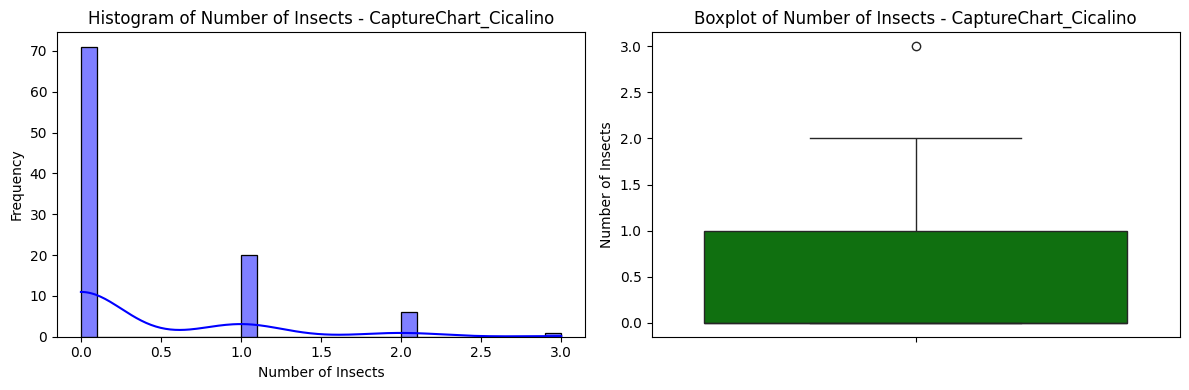

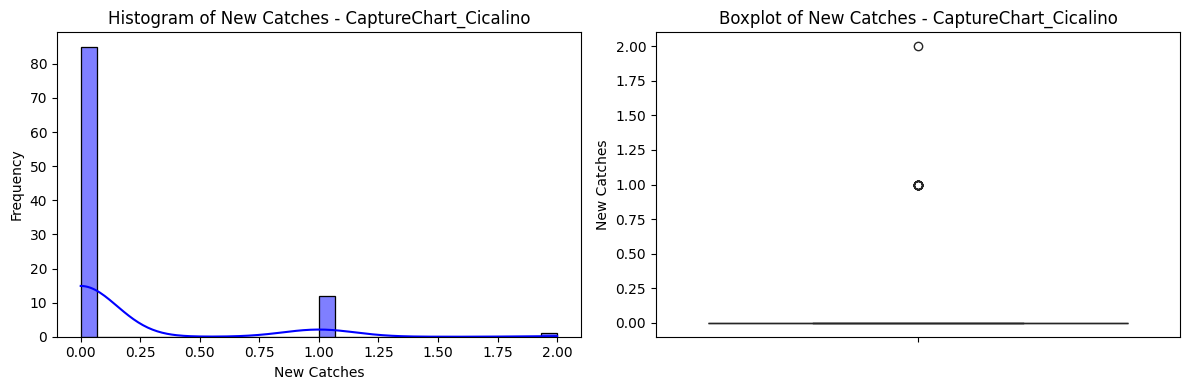

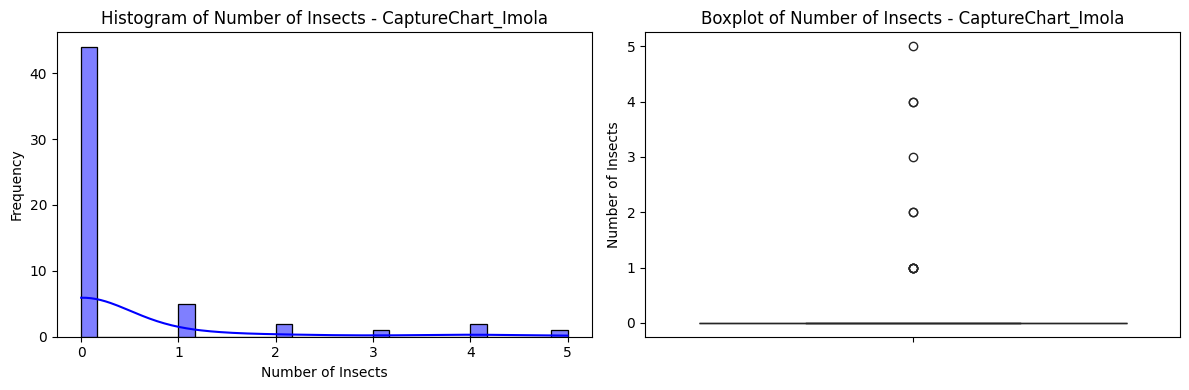

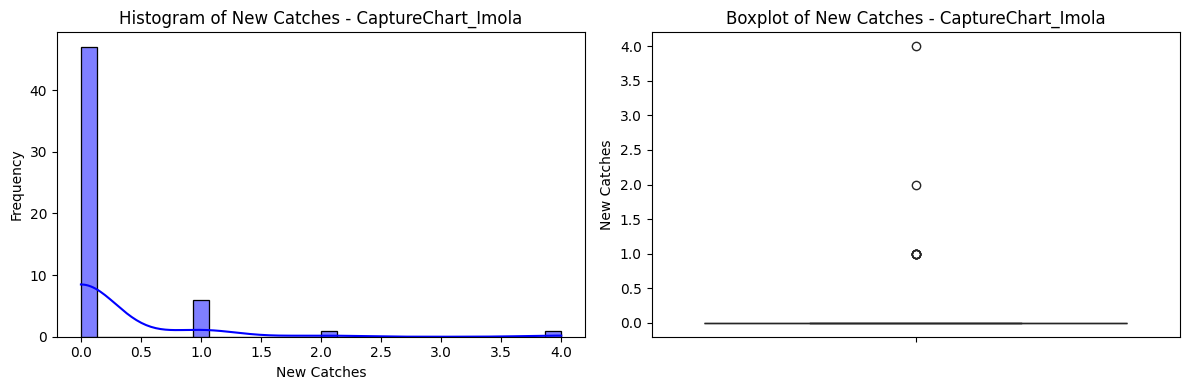

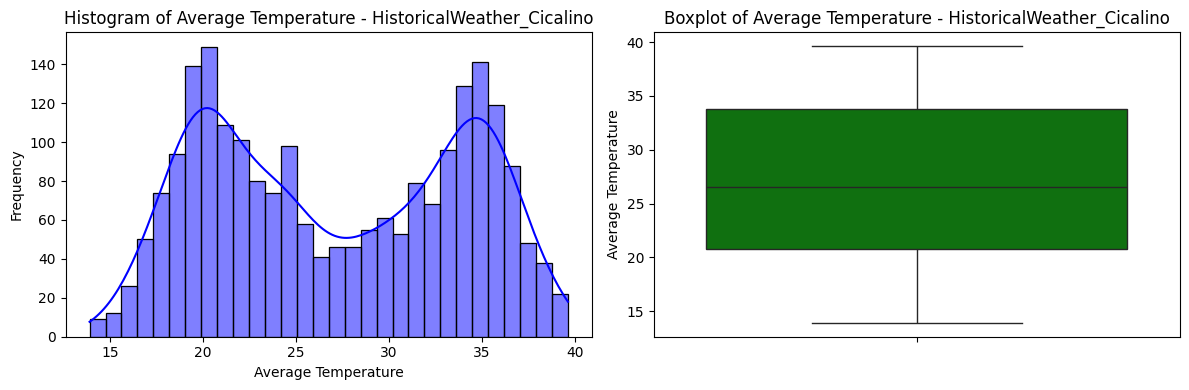

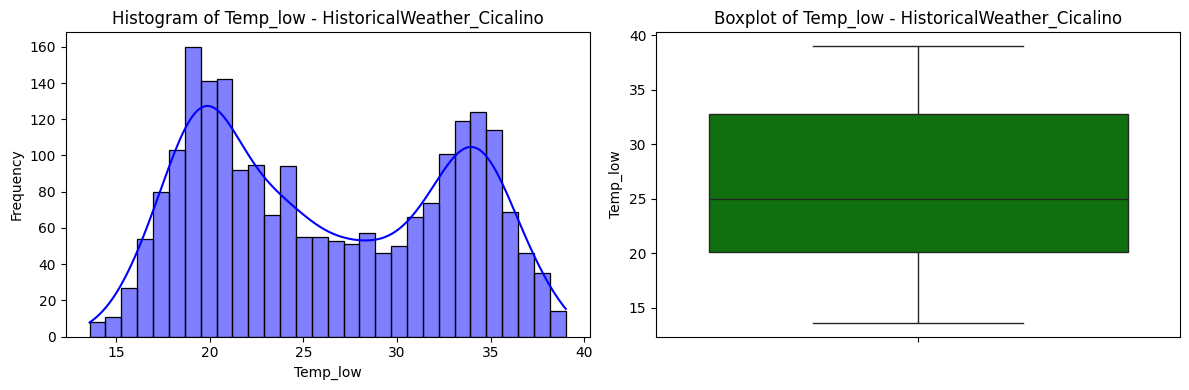

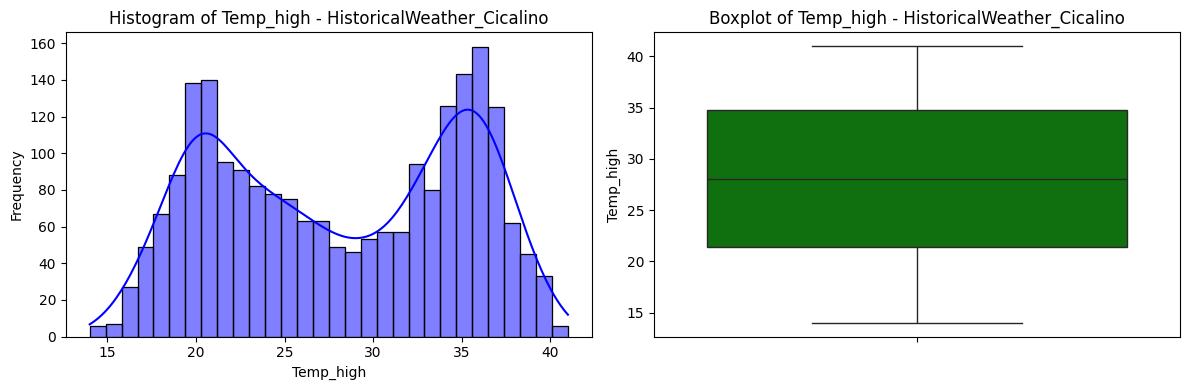

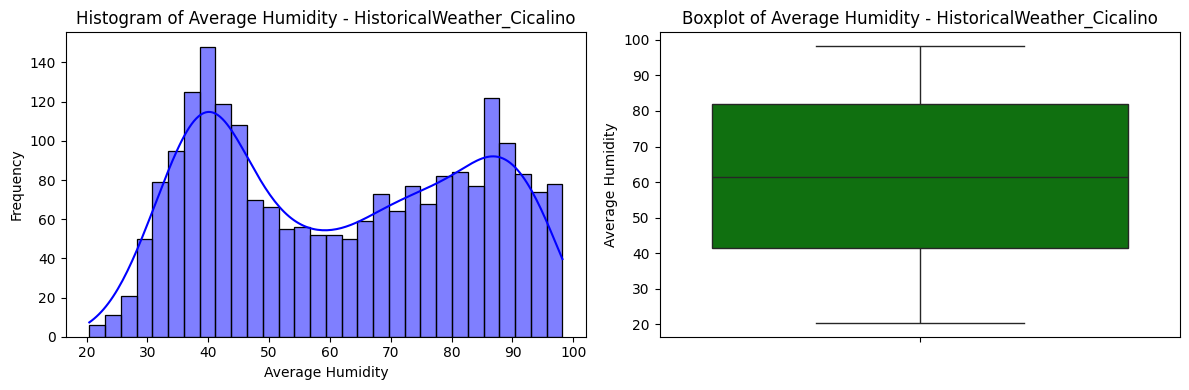

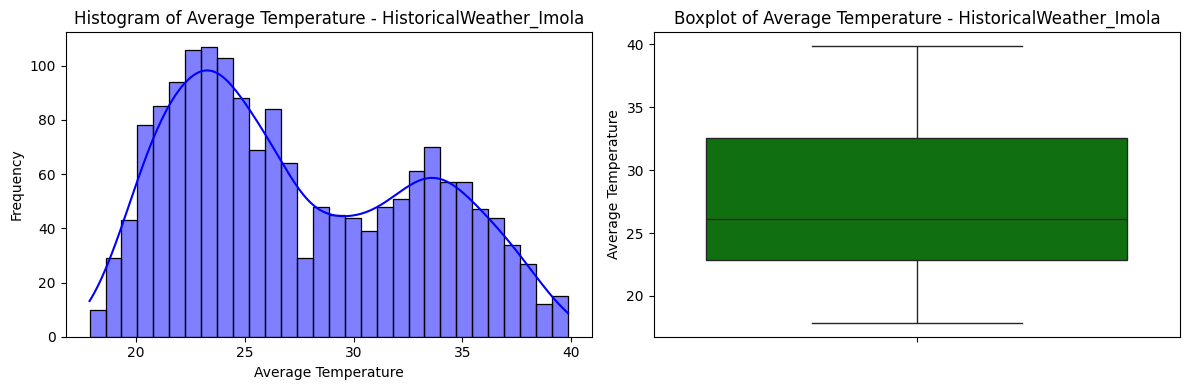

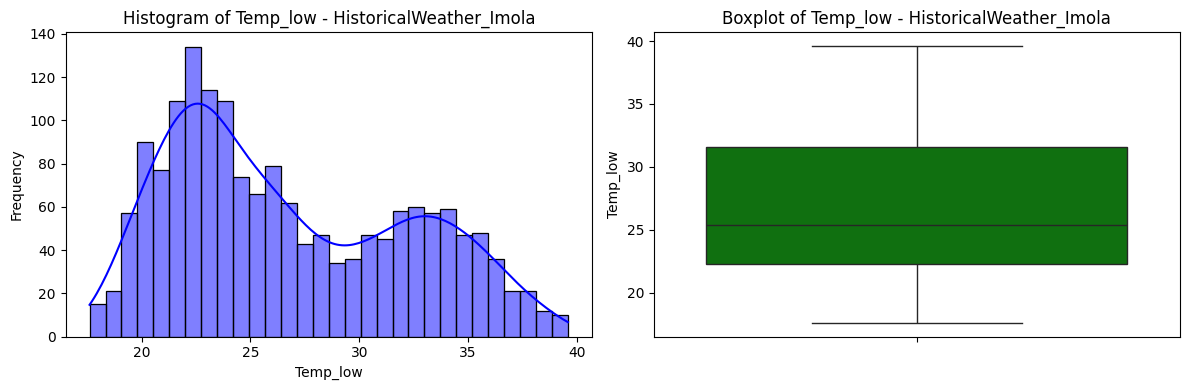

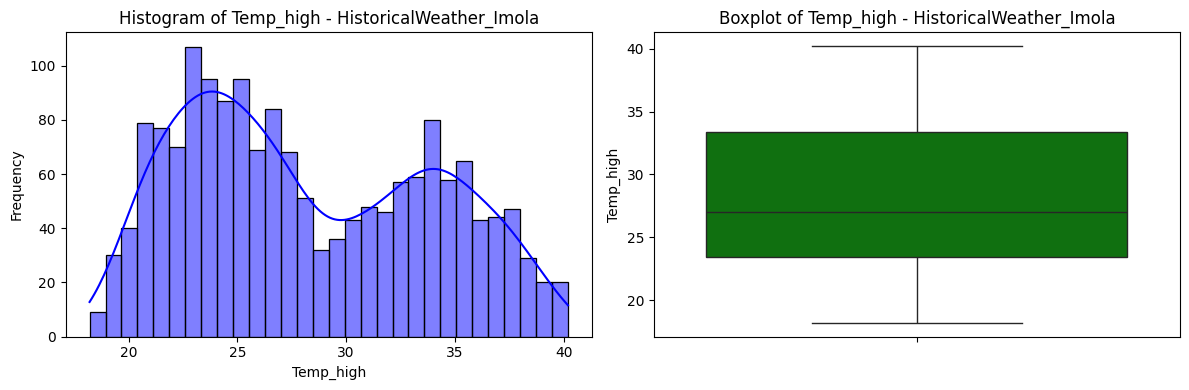

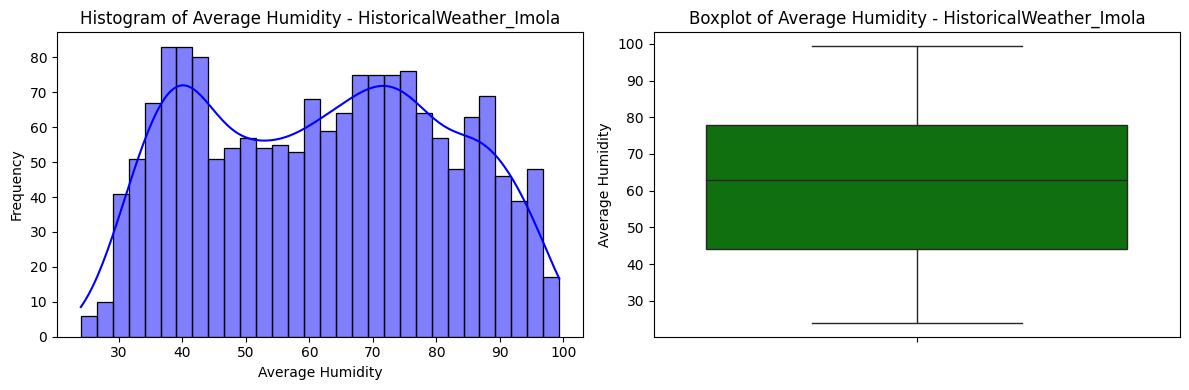

In [22]:
# Function to plot distributions
def plot_distributions(df, dataset_name):
    numeric_cols = df.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        plt.figure(figsize=(12, 4))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30, kde=True, color='blue')
        plt.title(f"Histogram of {col} - {dataset_name}")
        plt.xlabel(col)
        plt.ylabel("Frequency")

        # Box plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col], color='green')
        plt.title(f"Boxplot of {col} - {dataset_name}")

        plt.tight_layout()
        plt.show()

# Plot distributions for each dataset
plot_distributions(CaptureChart_Cicalino, "CaptureChart_Cicalino")
plot_distributions(CaptureChart_Imola, "CaptureChart_Imola")
plot_distributions(HistoricalWeather_Cicalino, "HistoricalWeather_Cicalino")
plot_distributions(HistoricalWeather_Imola, "HistoricalWeather_Imola")

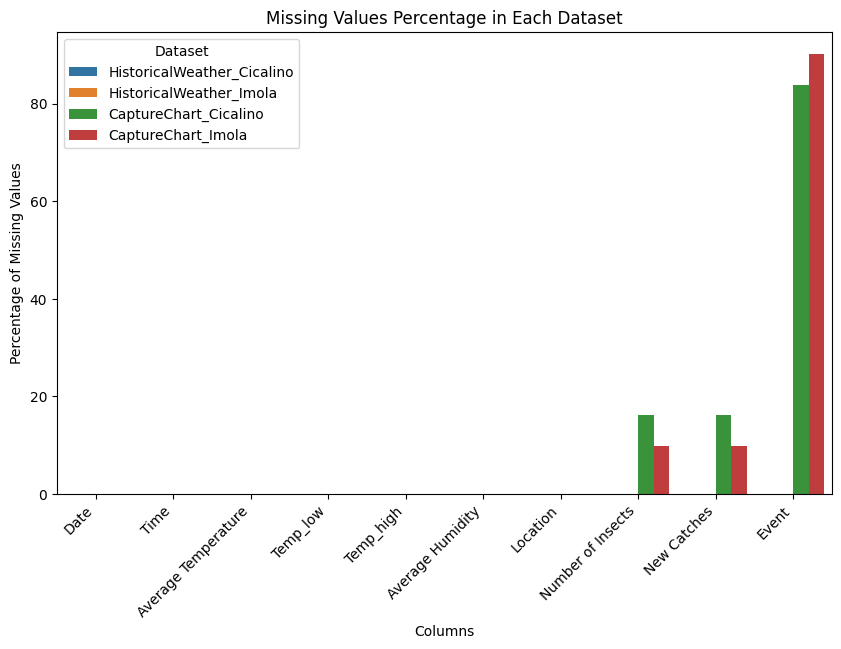

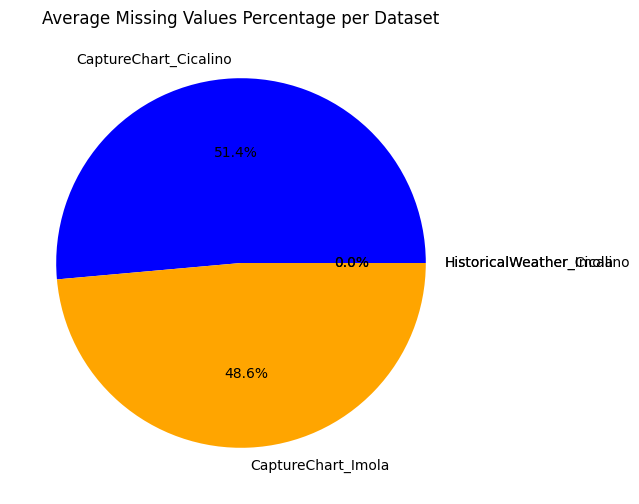

In [23]:
# Function to calculate missing values percentage
def missing_values(df, dataset_name):
    return pd.DataFrame({'Dataset': dataset_name, 'Column': df.columns, 'Missing %': df.isnull().mean() * 100})

# Calculate missing values for each dataset
missing_weather_cicalino = missing_values(HistoricalWeather_Cicalino, 'HistoricalWeather_Cicalino')
missing_weather_imola = missing_values(HistoricalWeather_Imola, 'HistoricalWeather_Imola')
missing_capture_cicalino = missing_values(CaptureChart_Cicalino, 'CaptureChart_Cicalino')
missing_capture_imola = missing_values(CaptureChart_Imola, 'CaptureChart_Imola')

# Combine all missing values
missing_data = pd.concat([missing_weather_cicalino, missing_weather_imola,
                          missing_capture_cicalino, missing_capture_imola])

# Plot missing values using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Missing %', hue='Dataset', data=missing_data)
plt.xticks(rotation=45, ha='right')
plt.title('Missing Values Percentage in Each Dataset')
plt.ylabel('Percentage of Missing Values')
plt.xlabel('Columns')
plt.legend(title='Dataset')
plt.show()

print("\n")

# Plot missing values using a pie chart (aggregated by dataset)
missing_summary = missing_data.groupby('Dataset')['Missing %'].mean()

plt.figure(figsize=(6, 6))
plt.pie(missing_summary, labels=missing_summary.index, autopct='%1.1f%%', colors=['blue', 'orange', 'green', 'red'])
plt.title('Average Missing Values Percentage per Dataset')
plt.show()

### Handeling Nan-Values in combined dataset

In [24]:
# Fill the Nan-Values in each dataset with 0 if missing value exists
CaptureChart_Cicalino.fillna(0, inplace=True)
HistoricalWeather_Cicalino.fillna(0, inplace=True)

CaptureChart_Imola.fillna(0, inplace=True)
HistoricalWeather_Imola.fillna(0, inplace=True)

# Check for missing values
print("Missing Values for CaptureChart_Cicalino: \n", CaptureChart_Cicalino.isnull().sum(), "\n")
print("Missing Values for HistoricalWeather_Cicalino: \n", HistoricalWeather_Cicalino.isnull().sum(), "\n")
print("Missing Values for CaptureChart_Imola: \n", CaptureChart_Imola.isnull().sum(), "\n")
print("Missing Values for HistoricalWeather_Imola: \n", HistoricalWeather_Imola.isnull().sum(), "\n")

Missing Values for CaptureChart_Cicalino: 
 Date                 0
Time                 0
Number of Insects    0
New Catches          0
Event                0
Location             0
dtype: int64 

Missing Values for HistoricalWeather_Cicalino: 
 Date                   0
Time                   0
Average Temperature    0
Temp_low               0
Temp_high              0
Average Humidity       0
Location               0
dtype: int64 

Missing Values for CaptureChart_Imola: 
 Date                 0
Time                 0
Number of Insects    0
New Catches          0
Event                0
Location             0
dtype: int64 

Missing Values for HistoricalWeather_Imola: 
 Date                   0
Time                   0
Average Temperature    0
Temp_low               0
Temp_high              0
Average Humidity       0
Location               0
dtype: int64 



In [25]:
# # Convert Date and Time columns to datetime format
# for df in [HistoricalWeather_Cicalino, HistoricalWeather_Imola, CaptureChart_Cicalino, CaptureChart_Imola]:
#     df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

# # Merge datasets on Datetime for comparison
# merg_cicalino = pd.merge(HistoricalWeather_Cicalino, CaptureChart_Cicalino, on="Datetime", how="left")
# merg_imola = pd.merge(HistoricalWeather_Imola, CaptureChart_Imola, on="Datetime", how="left")

# # Function to plot relationships
# def plot_relationships(merged_df, location):
#     # Temperature vs. Insect Captures
#     plt.figure(figsize=(8, 5))
#     sns.scatterplot(x=merged_df["Average Temperature"], y=merged_df["Number of Insects"], color="red")
#     plt.title(f"Temperature vs. Insect Captures - {location}")
#     plt.xlabel("Average Temperature (°C)")
#     plt.ylabel("Number of Insects")
#     plt.show()

#     # Humidity vs. Insect Captures
#     plt.figure(figsize=(8, 5))
#     sns.scatterplot(x=merged_df["Average Humidity"], y=merged_df["Number of Insects"], color="blue")
#     plt.title(f"Humidity vs. Insect Captures - {location}")
#     plt.xlabel("Average Humidity (%)")
#     plt.ylabel("Number of Insects")
#     plt.show()

#     # Temperature vs. Humidity (with regression line)
#     plt.figure(figsize=(8, 5))
#     sns.regplot(x=merged_df["Average Temperature"], y=merged_df["Average Humidity"], scatter_kws={'alpha':0.5}, line_kws={"color":"green"})
#     plt.title(f"Temperature vs. Humidity - {location}")
#     plt.xlabel("Average Temperature (°C)")
#     plt.ylabel("Average Humidity (%)")
#     plt.show()


# # Generate plots for both locations
# plot_relationships(merg_cicalino, "Cicalino")
# plot_relationships(merg_imola, "Imola")

### Preprocess data

### Calculste new features based on each day weather information

In [26]:
# Function to calculate som features
def process_weather_data(df):
    """
    Process a dataset to compute daily temperature and humidity statistics.

    Parameters:
        df (pd.DataFrame): DataFrame containing 'Date', 'Temperature', and 'Humidity' columns.
        - 'Date' should be in datetime or string format (convertible to datetime).

    Returns:
        pd.DataFrame: Original DataFrame with additional columns:
            - 'Day Avg_temp': Mean temperature for the day
            - 'Day Min_temp': Minimum temperature for the day
            - 'Day Max_temp': Maximum temperature for the day
            - 'Day Avg_Humidity': Mean humidity for the day
            - 'Temp_change': Difference between max and min temperature for the day
    """

    # Ensure Date column is in datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Calculate daily mean of "Average Temperature"
    daily_avg_temp = df.groupby('Date')['Average Temperature'].mean().rename("Day Avg_temp").round(2)

    # Find daily min of "Temp_low" and max of "Temp_high"
    daily_min_temp = df.groupby('Date')['Temp_low'].min().rename("Day Min_temp")
    daily_max_temp = df.groupby('Date')['Temp_high'].max().rename("Day Max_temp")

    # Calculate daily mean of "Average Humidity"
    daily_avg_humidity = df.groupby('Date')['Average Humidity'].mean().rename("Day Avg_Humidity").round(2)

    # Calculate temperature change (Max minus Min of "Temp_low" and "Temp_high")
    temp_change = (daily_max_temp - daily_min_temp).rename("Temp_change").round(2)

    # Merge calculated values back into the original dataframe
    df = df.merge(daily_avg_temp, on='Date', how='left')
    df = df.merge(daily_min_temp, on='Date', how='left')
    df = df.merge(daily_max_temp, on='Date', how='left')
    df = df.merge(daily_avg_humidity, on='Date', how='left')
    df = df.merge(temp_change, on='Date', how='left')

    return df


# Call process_weather_data function for Historical Weather data
Cicalino_HistoricalWeather_NewFeature = process_weather_data(HistoricalWeather_Cicalino)
Imola_HistoricalWeather_NewFeature = process_weather_data(HistoricalWeather_Imola)

# Display output
print("** Cicalino Historical Weather Data ** \n", Cicalino_HistoricalWeather_NewFeature.head(), "\n")
print("** Imola Historical Weather Data ** \n", Imola_HistoricalWeather_NewFeature.head(), "\n")

# Cicalino_HistoricalWeather_NewFeature.to_csv('Cicalino_HistoricalWeather_NewFeature.csv', index=False)
# Imola_HistoricalWeather_NewFeature.to_csv('Imola_HistoricalWeather_NewFeature.csv', index=False)

** Cicalino Historical Weather Data ** 
         Date      Time  Average Temperature  Temp_low  Temp_high  \
0 2024-07-05  15:00:00                31.65      31.1       32.2   
1 2024-07-05  16:00:00                31.45      31.0       32.2   
2 2024-07-05  17:00:00                31.66      31.2       32.1   
3 2024-07-05  18:00:00                30.08      29.2       30.8   
4 2024-07-05  19:00:00                28.78      26.5       29.6   

   Average Humidity   Location  Day Avg_temp  Day Min_temp  Day Max_temp  \
0             37.08  Cicalino1         25.78          16.0          32.2   
1             33.55  Cicalino1         25.78          16.0          32.2   
2             34.98  Cicalino1         25.78          16.0          32.2   
3             42.39  Cicalino1         25.78          16.0          32.2   
4             47.54  Cicalino1         25.78          16.0          32.2   

   Day Avg_Humidity  Temp_change  
0             56.67         16.2  
1             56.67    

##### Merge datasets Cicalino Historical Weader and Capture Chart datasets

In [27]:
# Load datasets
weather_cicalino = Cicalino_HistoricalWeather_NewFeature
capture_cicalino = CaptureChart_Cicalino

# Convert Date and Time to datetime format
weather_cicalino['Datetime'] = pd.to_datetime(weather_cicalino['Date'].astype(str) + ' ' + weather_cicalino['Time'].astype(str), errors='coerce')
capture_cicalino['Datetime'] = pd.to_datetime(capture_cicalino['Date'].astype(str) + ' ' + capture_cicalino['Time'].astype(str), errors='coerce')

# Extract only Date and Hour (ignore minutes & seconds)
weather_cicalino['Date_Hour'] = weather_cicalino['Datetime'].dt.strftime('%Y-%m-%d %H')
capture_cicalino['Date_Hour'] = capture_cicalino['Datetime'].dt.strftime('%Y-%m-%d %H')

# Select only required columns from weather dataset
cicalino_weather_selected = weather_cicalino[['Location','Date_Hour', 'Average Temperature', 'Temp_low', 'Temp_high', 'Average Humidity',
                                              "Day Avg_temp", "Day Min_temp", "Day Max_temp", "Day Avg_Humidity", "Temp_change"]]

# Merge datasets based on Date_Hour and Location
Merged_Cicalino = pd.merge(capture_cicalino, cicalino_weather_selected, on=['Date_Hour', 'Location'], how='left')

# Drop the intermediate Date_Hour column
Merged_Cicalino.drop(columns=['Date_Hour', 'Datetime'], inplace=True)

# Display the first few rows
print(Merged_Cicalino.head())

# # Save the merged dataset if needed
# Merged_Cicalino.to_csv("Merged_Cicalino.csv", index=False)

         Date      Time  Number of Insects  New Catches     Event   Location  \
0  2024-07-06  06:01:00                0.0          0.0         0  Cicalino1   
1  2024-07-07  06:04:00                0.0          0.0         0  Cicalino1   
2  2024-07-08  06:03:00                0.0          0.0         0  Cicalino1   
3  2024-07-09  06:05:00                0.0          0.0         0  Cicalino1   
4  2024-07-09  06:13:59                0.0          0.0  Cleaning  Cicalino1   

   Average Temperature  Temp_low  Temp_high  Average Humidity  Day Avg_temp  \
0                13.91      13.6       14.4             97.65         22.34   
1                20.78      20.1       21.2             83.49         23.52   
2                19.03      18.7       19.5             96.87         25.67   
3                15.33      15.0       15.7             82.29         25.87   
4                15.33      15.0       15.7             82.29         25.87   

   Day Min_temp  Day Max_temp  Day Avg_Humid

#### Deal with missing values

Merge datasets Imola Historical Weather and Capture Chart datasets

In [28]:
# Load datasets
weather_imola = Imola_HistoricalWeather_NewFeature
capture_imola = CaptureChart_Imola

# Convert Date and Time to datetime format
weather_imola['Datetime'] = pd.to_datetime(weather_imola['Date'].astype(str) + ' ' + weather_imola['Time'].astype(str), errors='coerce')
capture_imola['Datetime'] = pd.to_datetime(capture_imola['Date'].astype(str) + ' ' + capture_imola['Time'].astype(str), errors='coerce')

# Extract only Date and Hour (ignore minutes & seconds)
weather_imola['Date_Hour'] = weather_imola['Datetime'].dt.strftime('%Y-%m-%d %H')
capture_imola['Date_Hour'] = capture_imola['Datetime'].dt.strftime('%Y-%m-%d %H')

# Select only required columns from weather dataset
imola_weather_selected = weather_imola[['Location','Date_Hour', 'Average Temperature', 'Temp_low', 'Temp_high', 'Average Humidity',
                                        "Day Avg_temp", "Day Min_temp", "Day Max_temp", "Day Avg_Humidity", "Temp_change"]]

# Merge datasets based on Date_Hour
Merged_Imola = pd.merge(capture_imola, imola_weather_selected, on=['Date_Hour', 'Location'], how='left')

# Drop the intermediate Date_Hour column
Merged_Imola.drop(columns=['Date_Hour', 'Datetime'], inplace=True)

# Display the first few rows
print(Merged_Imola.head())

# # Save the merged dataset if needed
# Merged_Imola.to_csv("Merged_Imola.csv", index=False)

         Date      Time  Number of Insects  New Catches Event Location  \
0  2024-07-30  22:01:00                0.0          0.0     0   Imola1   
1  2024-07-31  22:03:00                0.0          0.0     0   Imola1   
2  2024-08-01  22:01:00                0.0          0.0     0   Imola1   
3  2024-08-02  22:03:00                0.0          0.0     0   Imola1   
4  2024-08-03  22:04:00                0.0          0.0     0   Imola1   

   Average Temperature  Temp_low  Temp_high  Average Humidity  Day Avg_temp  \
0                22.43      22.3       22.7             62.64         29.49   
1                23.85      23.5       24.1             61.68         28.86   
2                26.91      25.5       28.3             57.55         31.10   
3                24.42      24.2       24.8             79.93         27.80   
4                21.26      20.9       21.5             85.95         25.72   

   Day Min_temp  Day Max_temp  Day Avg_Humidity  Temp_change  
0          21.2  

#### Deal with duplicated data and Cleaning flag in column "Event" for Cicalino dataset

In [29]:
df = Merged_Cicalino

# Identify rows where Event is "Cleaning"
cleaning_rows = df[df["Event"] == "Cleaning"]

# Iterate over cleaning rows to update corresponding rows
for _, row in cleaning_rows.iterrows():
    df.loc[(df["Date"] == row["Date"]) & (df["Location"] == row["Location"]) & (df["Event"] != "Cleaning"), "Event"] = "1"

# Drop rows where Event is "Cleaning"
Updated_Merged_Cicalino = df[df["Event"] != "Cleaning"]

# # Save the modified file
# Updated_Merged_Cicalino.to_csv("Updated_Merged_Cicalino.csv", index=False)

# Return the path to the updated file
Updated_Merged_Cicalino.head()

,Date,Time,Number of Insects,New Catches,Event,Location,Average Temperature,Temp_low,Temp_high,Average Humidity,Day Avg_temp,Day Min_temp,Day Max_temp,Day Avg_Humidity,Temp_change
0,2024-07-06,06:01:00,0.0,0.0,0,Cicalino1,13.91,13.6,14.4,97.65,22.34,13.6,30.6,72.25,17.0
1,2024-07-07,06:04:00,0.0,0.0,0,Cicalino1,20.78,20.1,21.2,83.49,23.52,18.7,30.2,76.73,11.5
2,2024-07-08,06:03:00,0.0,0.0,0,Cicalino1,19.03,18.7,19.5,96.87,25.67,18.3,33.9,69.14,15.6
3,2024-07-09,06:05:00,0.0,0.0,1,Cicalino1,15.33,15.0,15.7,82.29,25.87,15.0,36.0,53.65,21.0
5,2024-07-10,06:03:00,0.0,0.0,0,Cicalino1,15.48,15.0,16.0,87.12,26.41,15.0,36.2,58.94,21.2


Deal with duplicated data and Cleaning flag in column "Event" for Imola dataset

In [30]:
df = Merged_Imola

# Identify rows where Event is "Cleaning"
cleaning_rows = df[df["Event"] == "Cleaning"]

# Iterate over cleaning rows to update corresponding rows
for _, row in cleaning_rows.iterrows():
    df.loc[(df["Date"] == row["Date"]) & (df["Location"] == row["Location"]) & (df["Event"] != "Cleaning"), "Event"] = "1"

# Drop rows where Event is "Cleaning"
Updated_Merged_Imola = df[df["Event"] != "Cleaning"]

# # Save the modified file
# Updated_Merged_Imola.to_csv("Updated_Merged_Imola.csv", index=False)

# Return the path to the updated file
Updated_Merged_Imola.head()

,Date,Time,Number of Insects,New Catches,Event,Location,Average Temperature,Temp_low,Temp_high,Average Humidity,Day Avg_temp,Day Min_temp,Day Max_temp,Day Avg_Humidity,Temp_change
0,2024-07-30,22:01:00,0.0,0.0,0,Imola1,22.43,22.3,22.7,62.64,29.49,21.2,35.5,42.67,14.3
1,2024-07-31,22:03:00,0.0,0.0,0,Imola1,23.85,23.5,24.1,61.68,28.86,19.3,38.8,51.96,19.5
2,2024-08-01,22:01:00,0.0,0.0,0,Imola1,26.91,25.5,28.3,57.55,31.10,22.4,40.0,43.79,17.6
3,2024-08-02,22:03:00,0.0,0.0,0,Imola1,24.42,24.2,24.8,79.93,27.80,19.9,37.3,66.32,17.4
4,2024-08-03,22:04:00,0.0,0.0,0,Imola1,21.26,20.9,21.5,85.95,25.72,19.7,32.1,72.36,12.4


### Merge both Cicalino ans Imola datasets

In [31]:
# Concatenate the datasets
Final_Merged_Dataset = pd.concat([Updated_Merged_Cicalino, Updated_Merged_Imola], ignore_index=True)


Final_Merged_Dataset.to_csv("Final_Merged_Dataset.csv", index=False)

# Return the path to the merged file
Final_Merged_Dataset.head()

,Date,Time,Number of Insects,New Catches,Event,Location,Average Temperature,Temp_low,Temp_high,Average Humidity,Day Avg_temp,Day Min_temp,Day Max_temp,Day Avg_Humidity,Temp_change
0,2024-07-06,06:01:00,0.0,0.0,0,Cicalino1,13.91,13.6,14.4,97.65,22.34,13.6,30.6,72.25,17.0
1,2024-07-07,06:04:00,0.0,0.0,0,Cicalino1,20.78,20.1,21.2,83.49,23.52,18.7,30.2,76.73,11.5
2,2024-07-08,06:03:00,0.0,0.0,0,Cicalino1,19.03,18.7,19.5,96.87,25.67,18.3,33.9,69.14,15.6
3,2024-07-09,06:05:00,0.0,0.0,1,Cicalino1,15.33,15.0,15.7,82.29,25.87,15.0,36.0,53.65,21.0
4,2024-07-10,06:03:00,0.0,0.0,0,Cicalino1,15.48,15.0,16.0,87.12,26.41,15.0,36.2,58.94,21.2


In [32]:
#######################
# # Load dataset
# df = pd.read_csv("Final_Merged_Dataset.csv")

# # Combine 'Date' and 'Time' columns into a single datetime column
# df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# # Set as index for time-based operations
# df.set_index('Datetime', inplace=True)

# # # Drop original 'Date' and 'Time' columns
# # df.drop(columns=['Date', 'Time'], inplace=True)

# # Check for missing values
# missing_values = df.isnull().sum()
# print("Missing Values per Column:")
# print(missing_values)

# # Apply time-based interpolation if missing values exist
# if missing_values.sum() > 0:
#     df.interpolate(method='time', inplace=True)
#     df.round(2)
#     print("Missing values have been interpolated using time-based method.")
# else:
#     print("No missing values detected.")

# # Save the cleaned dataset
# df.to_csv("Final_Merged_Dataset_Cleaned.csv")

In [33]:
# Function to estimate and fill missing values
def interpolate_missing_values(df, location_col, target_cols):
    """
    Fill missing values using time-based interpolation for a specific location.

    Parameters:
    df (pd.DataFrame): The dataset containing missing values.
    location_col (str): Column name representing the location.
    target_cols (list): List of columns to interpolate.

    Returns:
    pd.DataFrame: Dataset with missing values filled.
    """
    df = df.copy()

    # Filter data for Cicalino2
    cicalino2_data = df[df[location_col] == "Cicalino2"].sort_values(by="Time")

    #print(cicalino2_data)

    # Interpolate missing values for each target column
    for col in target_cols:
        cicalino2_data[col] = cicalino2_data[col].interpolate(method='linear', limit_direction='both')

    # Merge back into the main dataframe
    df.update(cicalino2_data)

    return df

# Function to Identify missing values and send to "interpolate_missing_values" each in time
def handle_missing_values(df, location_col, target_cols):
    """
    Identify missing values, send them to interpolation, and return the updated dataset.

    Parameters:
    df (pd.DataFrame): The dataset containing missing values.
    location_col (str): Column name representing the location.
    target_cols (list): List of columns to check for missing values.

    Returns:
    pd.DataFrame: Updated dataset with missing values handled.
    """
    # Check for missing values
    missing_mask = df[target_cols].isnull().any(axis=1)
    missing_rows = df[missing_mask]

    if missing_rows.empty:
        print("No missing values detected.")
        return df

    print(f"Found {len(missing_rows)} rows with missing values. Applying interpolation... \n")

    # Apply interpolation function
    df = interpolate_missing_values(df, location_col, target_cols)

    return df

# Use Time-based interpolation to handle missing values
Final_Merged_Dataset_Cleaned = handle_missing_values(Final_Merged_Dataset, location_col="Location", target_cols=["Average Temperature", "Temp_low", "Temp_high", "Average Humidity",
                                                                                       "Day Avg_temp", "Day Min_temp", "Day Max_temp", "Day Avg_Humidity", "Temp_change"])

Final_Merged_Dataset_Cleaned.to_csv("Final_Merged_Dataset_Cleaned.csv", index=False)

print("The final dataset: \n")
Final_Merged_Dataset_Cleaned.head()

Found 5 rows with missing values. Applying interpolation... 

The final dataset: 



,Date,Time,Number of Insects,New Catches,Event,Location,Average Temperature,Temp_low,Temp_high,Average Humidity,Day Avg_temp,Day Min_temp,Day Max_temp,Day Avg_Humidity,Temp_change
0,2024-07-06,06:01:00,0.0,0.0,0,Cicalino1,13.91,13.6,14.4,97.65,22.34,13.6,30.6,72.25,17.0
1,2024-07-07,06:04:00,0.0,0.0,0,Cicalino1,20.78,20.1,21.2,83.49,23.52,18.7,30.2,76.73,11.5
2,2024-07-08,06:03:00,0.0,0.0,0,Cicalino1,19.03,18.7,19.5,96.87,25.67,18.3,33.9,69.14,15.6
3,2024-07-09,06:05:00,0.0,0.0,1,Cicalino1,15.33,15.0,15.7,82.29,25.87,15.0,36.0,53.65,21.0
4,2024-07-10,06:03:00,0.0,0.0,0,Cicalino1,15.48,15.0,16.0,87.12,26.41,15.0,36.2,58.94,21.2


## EDA on Preprocessed data

### Preprocessed Dataset Overview:
- Total Rows: 153
- Total Columns: 15
- Data Types:
  - 3 Object (String) Columns: `Date`, `Time`, `Location`
  - 11 Float Columns: `Number of Insects`, `New Catches`, `Average Temperature`, `Temp_low`, `Temp_high`, `Average Humidity`, `Day Avg_temp`, `Day Min_temp`, `Day Max_temp`, `Day Avg_Humidity`, and `Temp_change`
  - 1 Integer Column: `Event`, Binary indicator (0 or 1), representing an event occurrence.

### Column Breakdown:
1. Date & Time: Represent the timestamp of each record.
2. Number of Insects & New Catches: Key target variables for regression and classification.
3. Event: Binary indicator, possibly for significant occurrences.
4. Location: Specifies data collection sites (Cicalino1, etc.).
5. Temperature & Humidity Variables:
  - Includes averages, daily minimum/maximum, and changes.
6. Temp_change: Measures temperature variation.

### Observations:
- No missing values.
- The dataset is structured with meteorological and pest count variables, ideal for predictive modeling.

In [34]:
# Summary of final dataset
Final_Merged_Dataset_Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 153 non-null    object 
 1   Time                 153 non-null    object 
 2   Number of Insects    153 non-null    float64
 3   New Catches          153 non-null    float64
 4   Event                153 non-null    object 
 5   Location             153 non-null    object 
 6   Average Temperature  153 non-null    float64
 7   Temp_low             153 non-null    float64
 8   Temp_high            153 non-null    float64
 9   Average Humidity     153 non-null    float64
 10  Day Avg_temp         153 non-null    float64
 11  Day Min_temp         153 non-null    float64
 12  Day Max_temp         153 non-null    float64
 13  Day Avg_Humidity     153 non-null    float64
 14  Temp_change          153 non-null    float64
dtypes: float64(11), object(4)
memory usage: 

In [35]:
# Summay of final dataset
print(Final_Merged_Dataset_Cleaned.describe())

       Number of Insects  New Catches  Average Temperature    Temp_low  \
count         153.000000   153.000000           153.000000  153.000000   
mean            0.392157     0.169935            20.569641   20.224183   
std             0.844762     0.497240             2.855747    2.787006   
min             0.000000     0.000000            13.910000   13.600000   
25%             0.000000     0.000000            18.490000   18.300000   
50%             0.000000     0.000000            20.280000   20.000000   
75%             0.000000     0.000000            22.450000   21.900000   
max             5.000000     4.000000            27.000000   26.200000   

        Temp_high  Average Humidity  Day Avg_temp  Day Min_temp  Day Max_temp  \
count  153.000000        153.000000    153.000000    153.000000    153.000000   
mean    20.977451         82.332582     27.029020     18.768301     36.191176   
std      2.934341         10.905657      2.160891      1.998641      3.827868   
min     1

In [36]:
# Check for missing values in final dataset
print(Final_Merged_Dataset_Cleaned.isnull().sum())

Date                   0
Time                   0
Number of Insects      0
New Catches            0
Event                  0
Location               0
Average Temperature    0
Temp_low               0
Temp_high              0
Average Humidity       0
Day Avg_temp           0
Day Min_temp           0
Day Max_temp           0
Day Avg_Humidity       0
Temp_change            0
dtype: int64


## Visualization

In [37]:
# Copy dataset fto a new dataframe
Final_df = Final_Merged_Dataset_Cleaned.copy()

# Convert Date to datetime format
Final_df['Date'] = pd.to_datetime(Final_df['Date'])

print(Final_df.head())

        Date      Time  Number of Insects  New Catches Event   Location  \
0 2024-07-06  06:01:00                0.0          0.0     0  Cicalino1   
1 2024-07-07  06:04:00                0.0          0.0     0  Cicalino1   
2 2024-07-08  06:03:00                0.0          0.0     0  Cicalino1   
3 2024-07-09  06:05:00                0.0          0.0     1  Cicalino1   
4 2024-07-10  06:03:00                0.0          0.0     0  Cicalino1   

   Average Temperature  Temp_low  Temp_high  Average Humidity  Day Avg_temp  \
0                13.91      13.6       14.4             97.65         22.34   
1                20.78      20.1       21.2             83.49         23.52   
2                19.03      18.7       19.5             96.87         25.67   
3                15.33      15.0       15.7             82.29         25.87   
4                15.48      15.0       16.0             87.12         26.41   

   Day Min_temp  Day Max_temp  Day Avg_Humidity  Temp_change  
0          

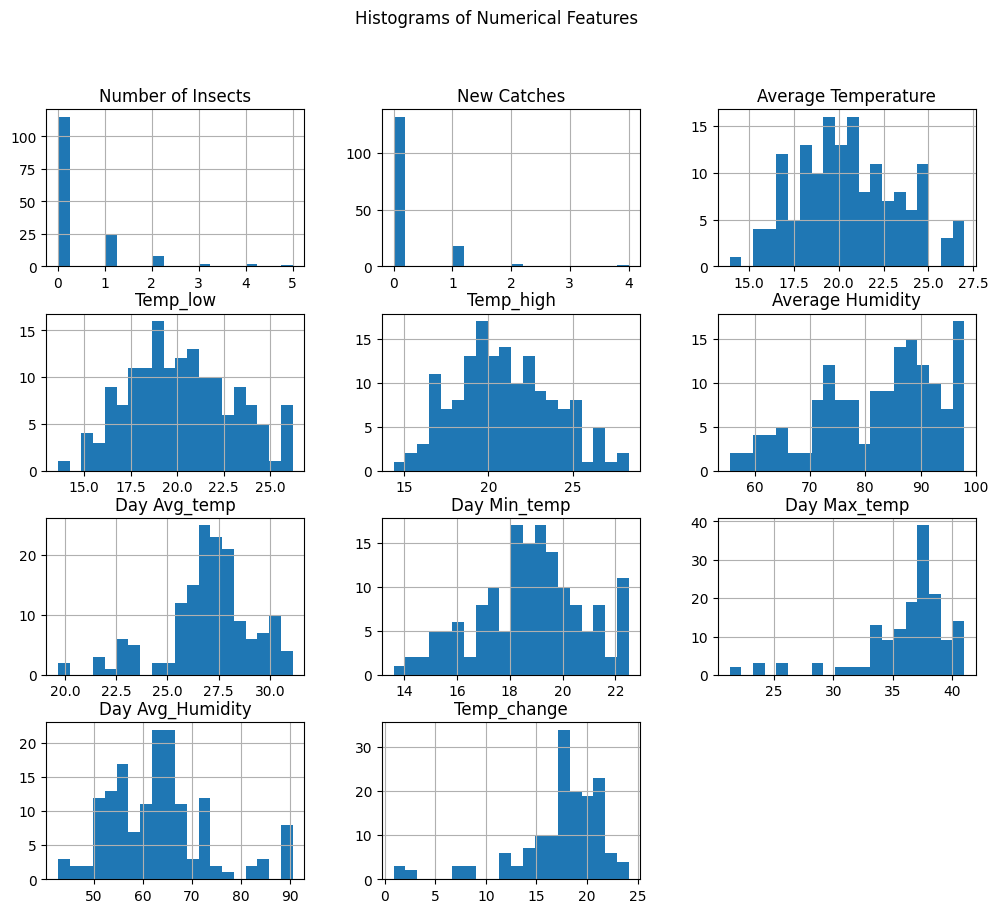

In [38]:
# 1. Check distributions using histograms
numerical_cols = Final_df.select_dtypes(include=['float64', 'int64']).columns
Final_df[numerical_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

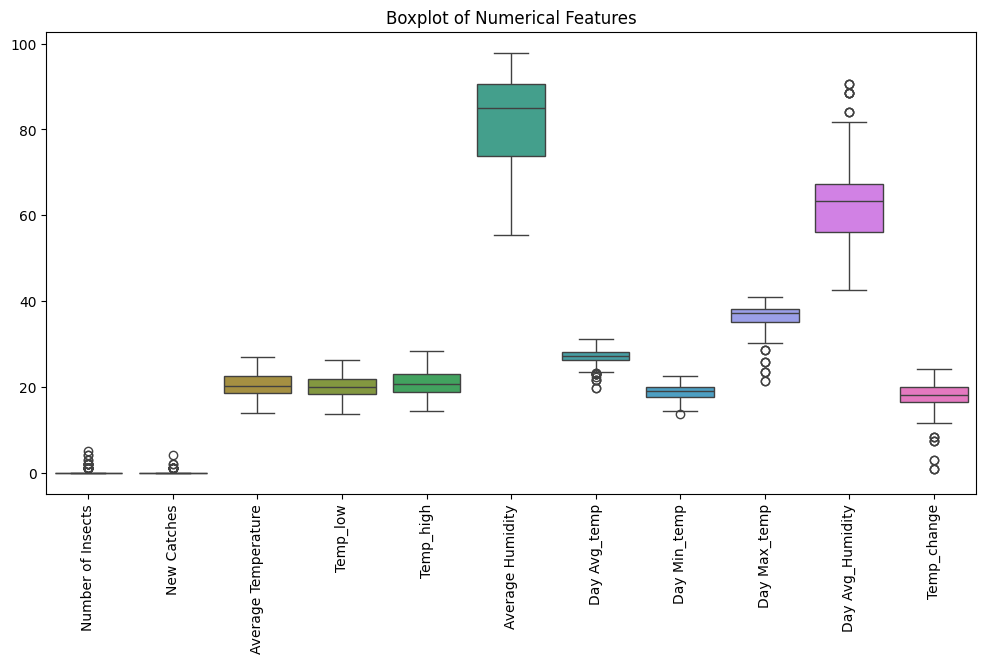

In [39]:
# 2. Identify outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=Final_df[numerical_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()

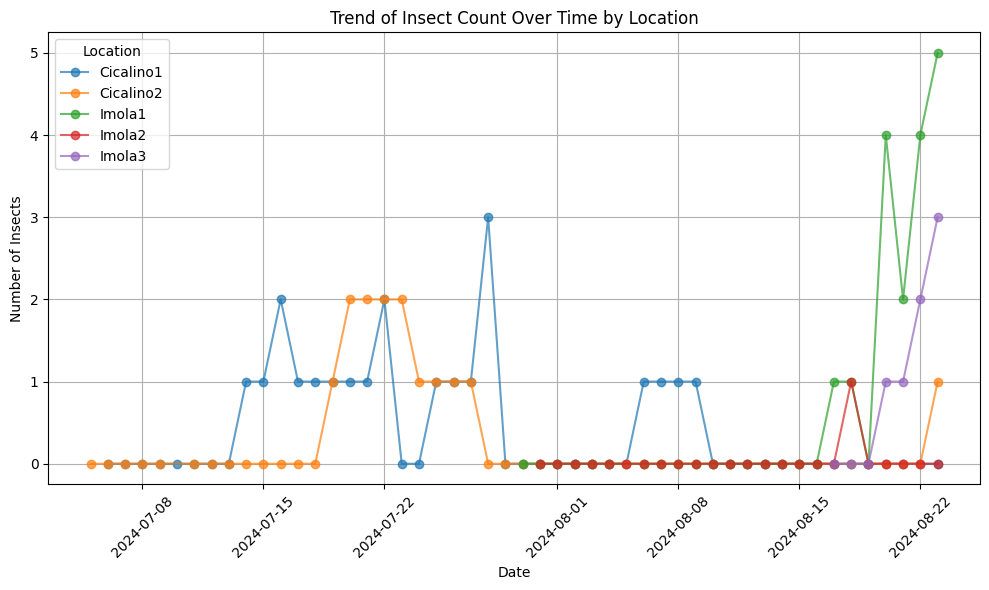

In [51]:
# 3. Trend analysis: Number of Insects over time

# Get unique locations
locations = Final_df['Location'].unique()

# Plot the trend for each location
plt.figure(figsize=(10, 6))
for location in locations:
    location_data = Final_df[Final_df['Location'] == location]
    plt.plot(location_data['Date'], location_data['Number of Insects'], marker='o', linestyle='-', alpha=0.7, label=location)

plt.xlabel("Date")
plt.ylabel("Number of Insects")
plt.title("Trend of Insect Count Over Time by Location")
plt.xticks(rotation=45)
plt.legend(title="Location")
plt.grid(True)
plt.tight_layout()
plt.show()

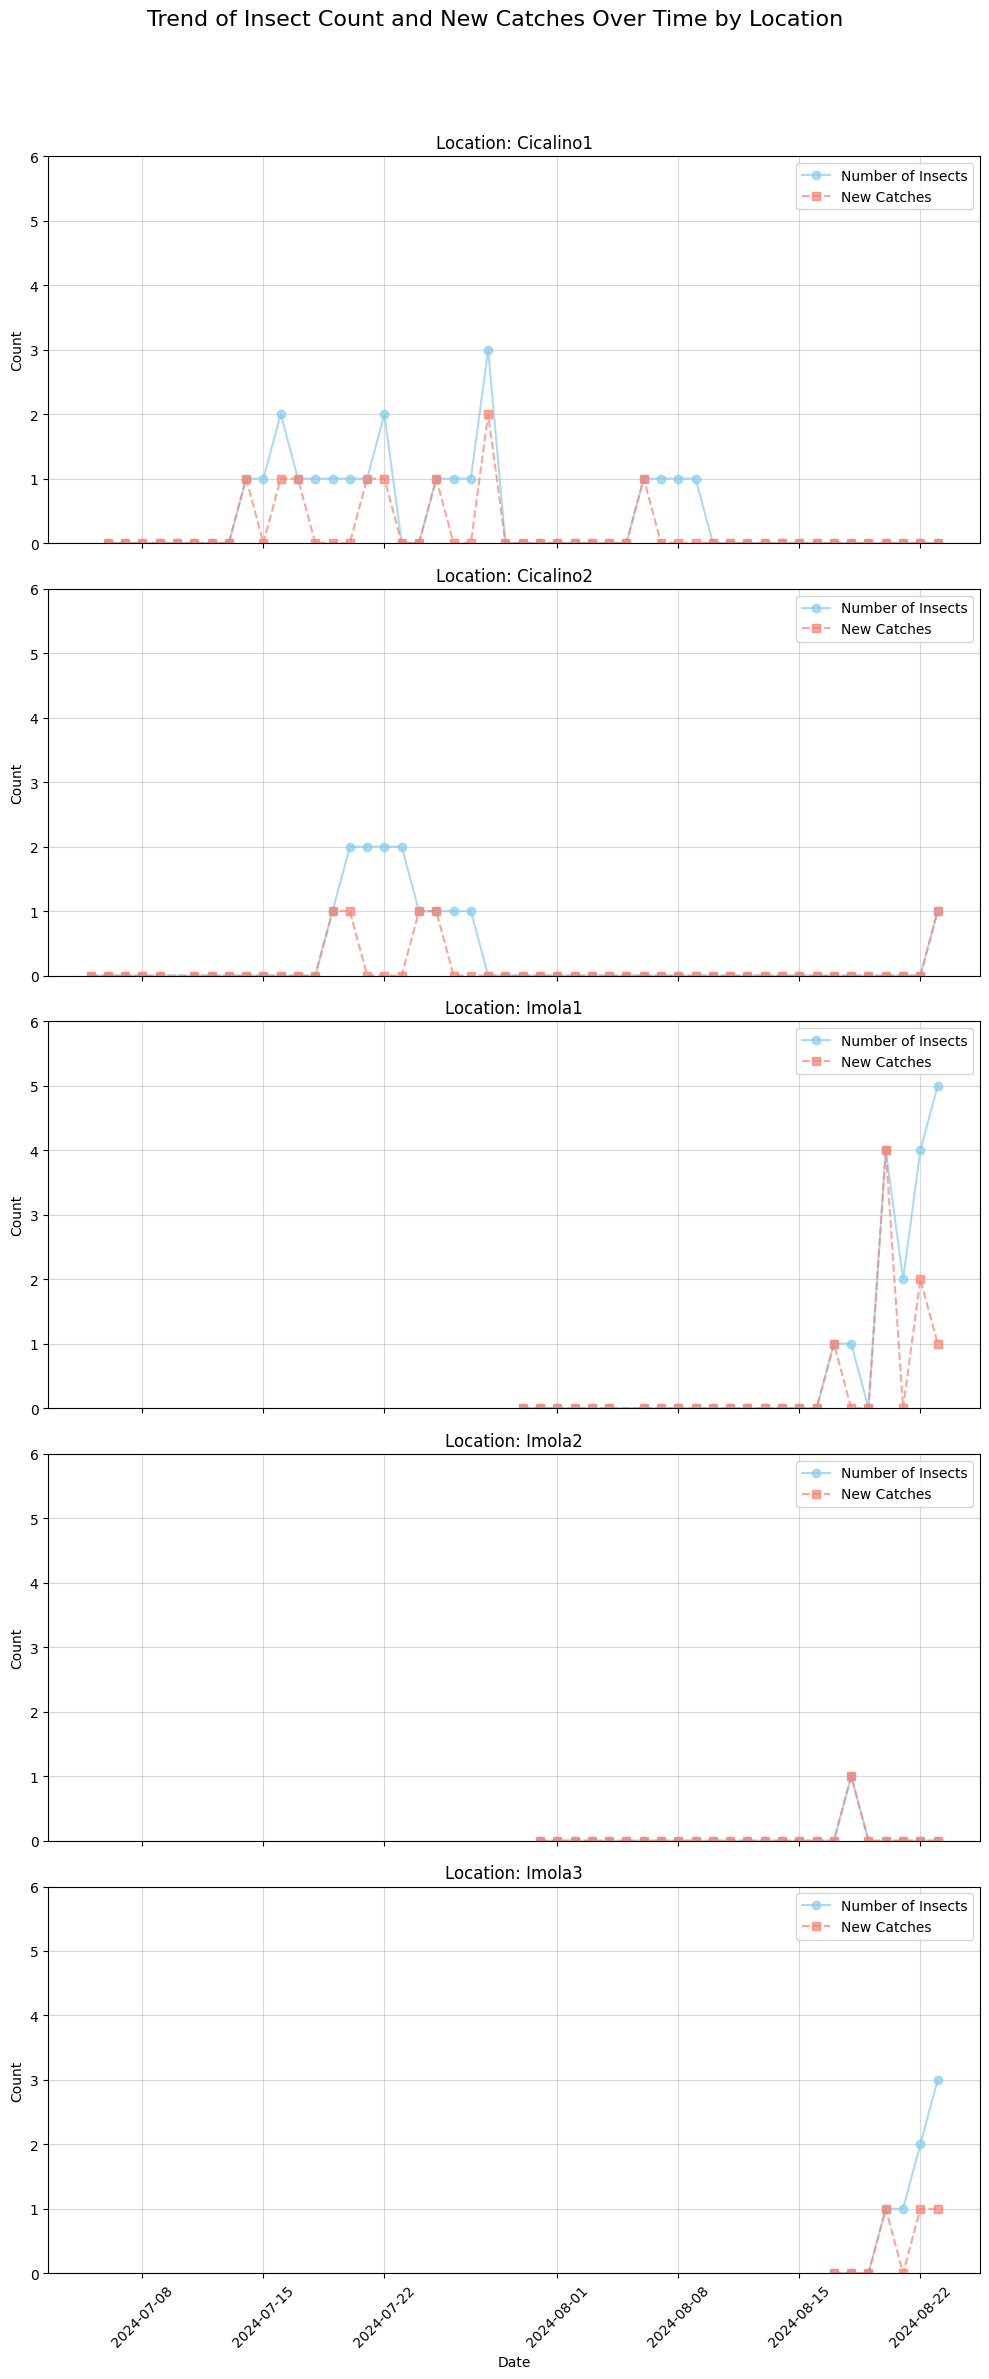

In [62]:
# Get unique locations
locations = Final_df['Location'].unique()

# Plot the trends for each location in separate subplots
num_locations = len(locations)
fig, axes = plt.subplots(num_locations, 1, figsize=(10, 5 * num_locations), sharex=True)
fig.suptitle("Trend of Insect Count and New Catches Over Time by Location", fontsize=16)

for i, location in enumerate(locations):
    location_data = Final_df[Final_df['Location'] == location]

    ax = axes[i]
    ax.plot(location_data['Date'], location_data['Number of Insects'], marker='o', linestyle='-', alpha=0.7, label='Number of Insects', color='skyblue')
    ax.plot(location_data['Date'], location_data['New Catches'], marker='s', linestyle='--', alpha=0.7, label='New Catches', color='salmon')
    ax.set_ylabel("Count")
    ax.set_title(f"Location: {location}")
    ax.legend()
    # ax.grid(True, which='major', linestyle='-', linewidth=0.5, alpha=0.7) # Customize major grid lines
    # ax.grid(True, which='minor', linestyle=':', linewidth=0.3, alpha=0.5) # Add minor grid lines
    ax.grid(True, alpha=0.5)
    ax.set_ylim(0, 6)

axes[-1].set_xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

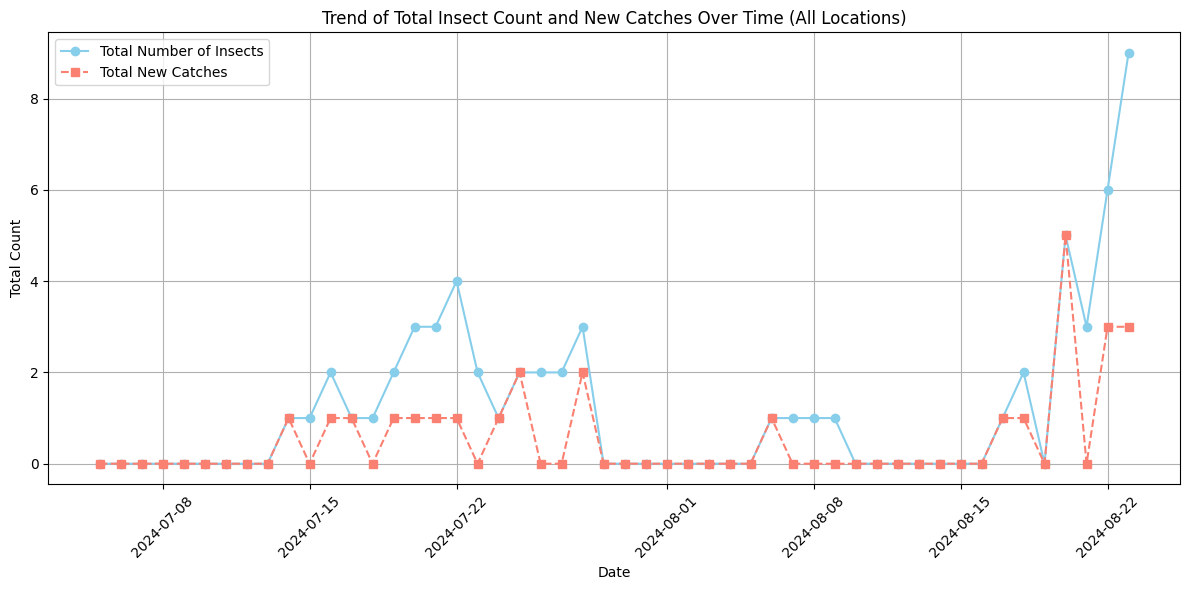

In [63]:
# Group by Date and sum 'Number of Insects' and 'New Catches'
daily_summary = Final_df.groupby('Date')[['Number of Insects', 'New Catches']].sum().reset_index()

# Plotting the trends
plt.figure(figsize=(12, 6))

plt.plot(daily_summary['Date'], daily_summary['Number of Insects'], marker='o', linestyle='-', color='skyblue', label='Total Number of Insects')
plt.plot(daily_summary['Date'], daily_summary['New Catches'], marker='s', linestyle='--', color='salmon', label='Total New Catches')

plt.xlabel("Date")
plt.ylabel("Total Count")
plt.title("Trend of Total Insect Count and New Catches Over Time (All Locations)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

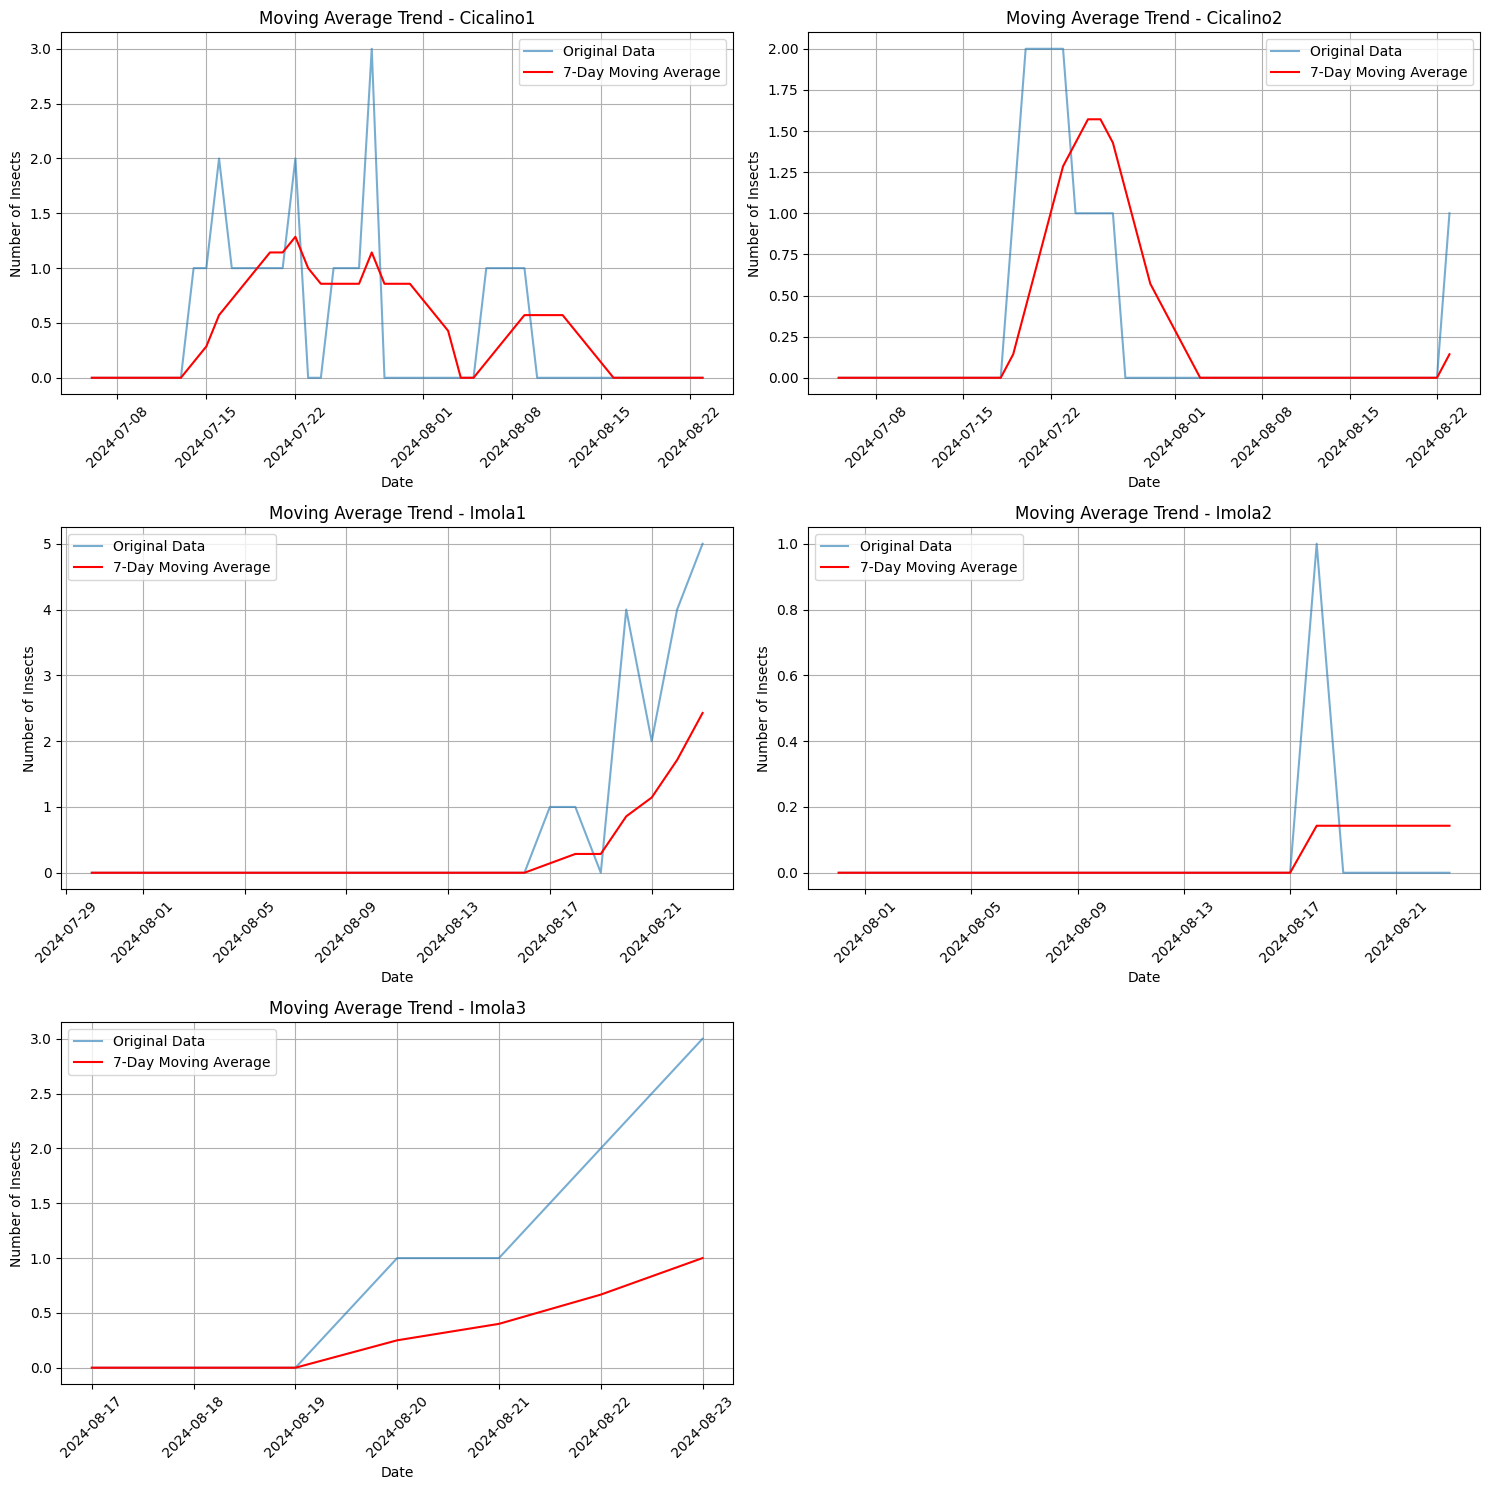

In [67]:
# 4. Moving averages for smoothing trends

# Group by 'Location'
grouped = Final_df.groupby('Location')

# Calculate the number of locations
num_locations = len(grouped)

# Determine the number of rows and columns for subplots
num_rows = (num_locations + 1) // 2  # Adjust as needed for layout
num_cols = min(num_locations, 2)  # Display up to 2 plots per row

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Iterate through each location and plot
for i, (location, group) in enumerate(grouped):
    # Sort the group by date
    group = group.sort_values(by='Date')

    # Calculate the 7-day rolling average
    group['Rolling_Avg'] = group['Number of Insects'].rolling(window=7, min_periods=1).mean()

    # Plot the original data and the moving average
    ax = axes[i]
    ax.plot(group['Date'], group['Number of Insects'], label='Original Data', alpha=0.6)
    ax.plot(group['Date'], group['Rolling_Avg'], label='7-Day Moving Average', color='red')
    ax.set_xlabel("Date")
    ax.set_ylabel("Number of Insects")
    ax.set_title(f"Moving Average Trend - {location}")
    ax.legend()
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

# Remove any unused subplots
if num_locations < len(axes):
    for i in range(num_locations, len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### 5. Event impact analysis

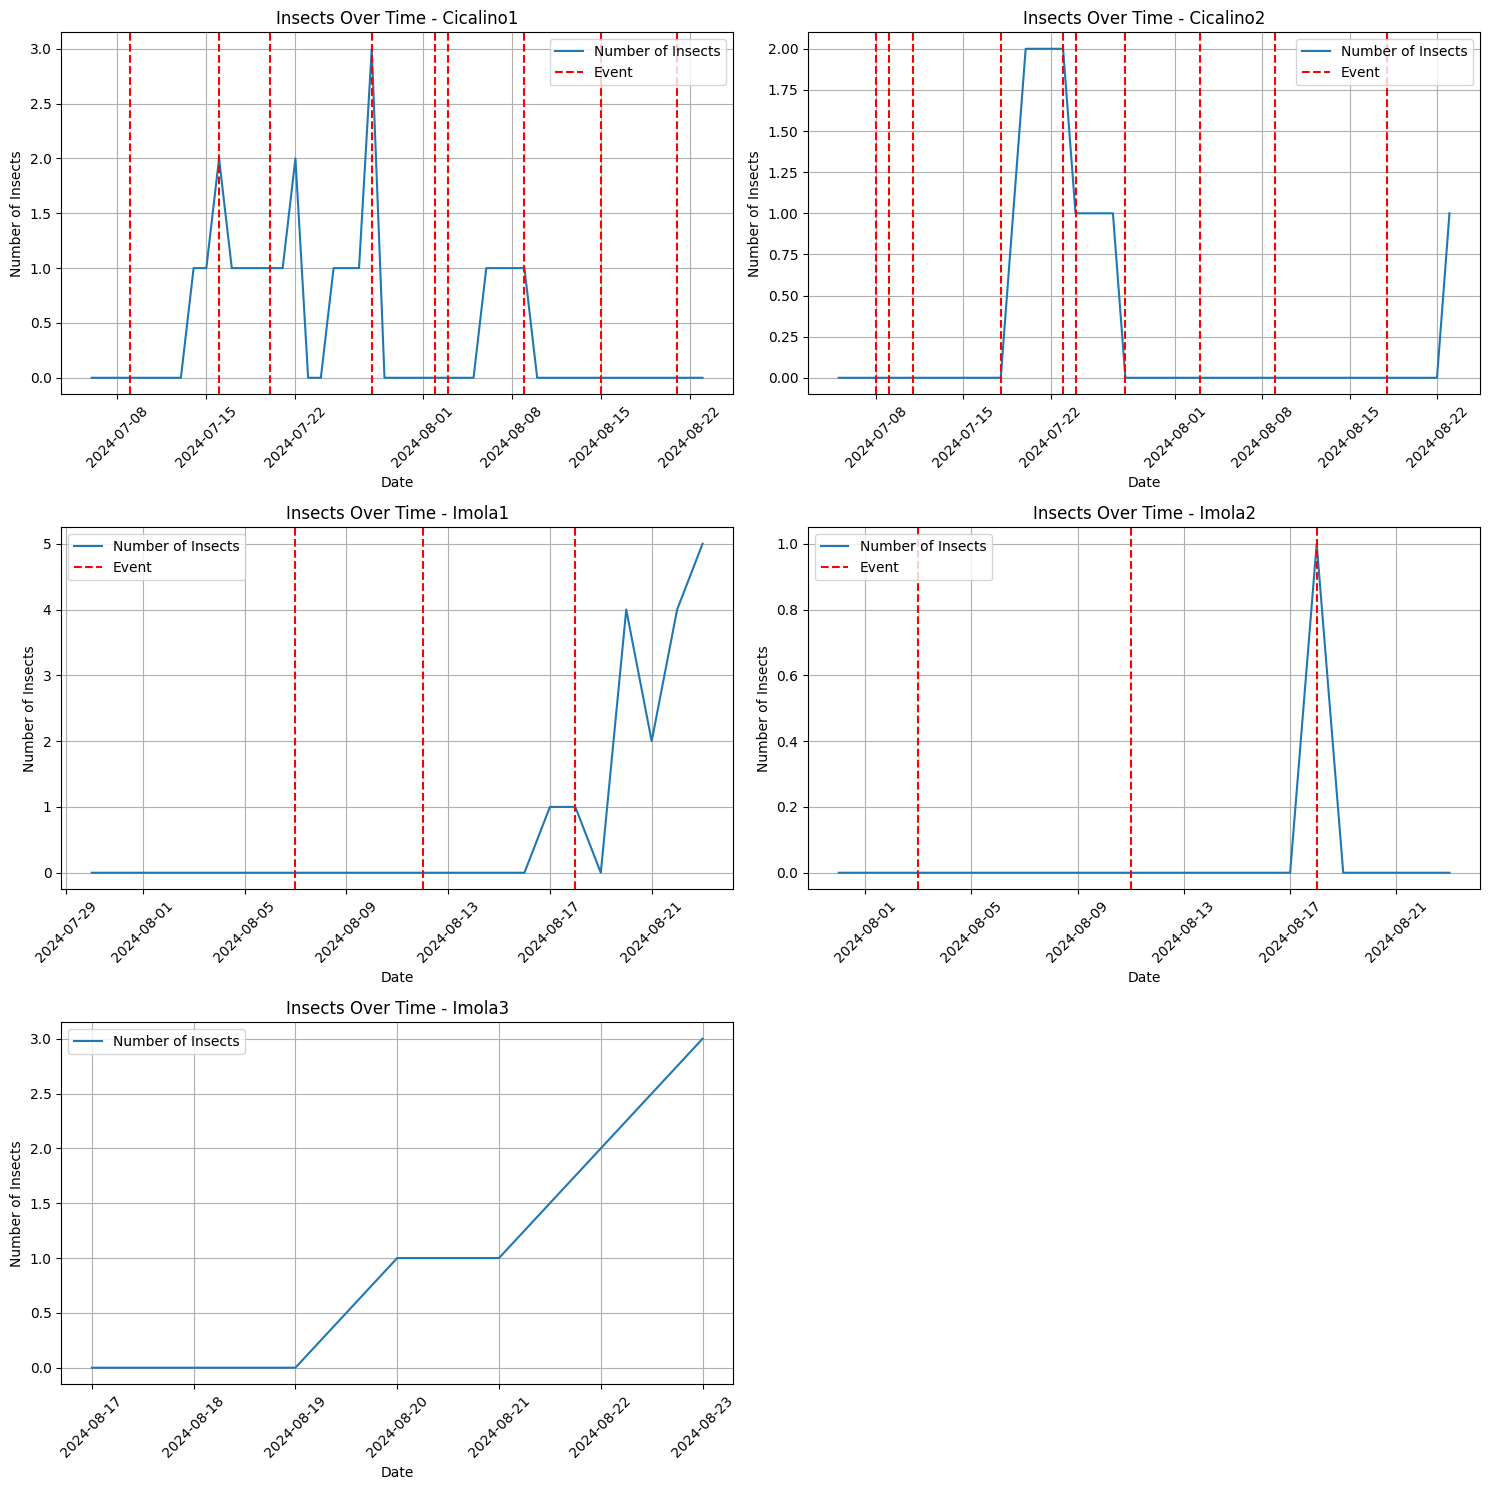

In [72]:
# Group by 'Location'
grouped = Final_df.groupby('Location')

# Create subplots for each location
num_locations = len(grouped)
num_rows = (num_locations + 1) // 2
num_cols = min(num_locations, 2)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Iterate through each location and plot
for i, (location, group) in enumerate(grouped):
    ax = axes[i]
    ax.plot(group['Date'], group['Number of Insects'], label='Number of Insects')

    # Identify event dates for the current location
    event_dates_location = group[group['Event'] != 0]['Date']

    # Plot vertical lines for event dates at this location
    for date in event_dates_location:
        ax.axvline(x=date, color='r', linestyle='--', label='Event' if date == event_dates_location.iloc[0] else "")

    ax.set_xlabel("Date")
    ax.set_ylabel("Number of Insects")
    ax.set_title(f"Insects Over Time - {location}")
    ax.legend()
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

# Remove any unused subplots
if num_locations < len(axes):
    for j in range(num_locations, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Average number of insects on days with events: 0.48
Average number of insects on days without events: 0.38


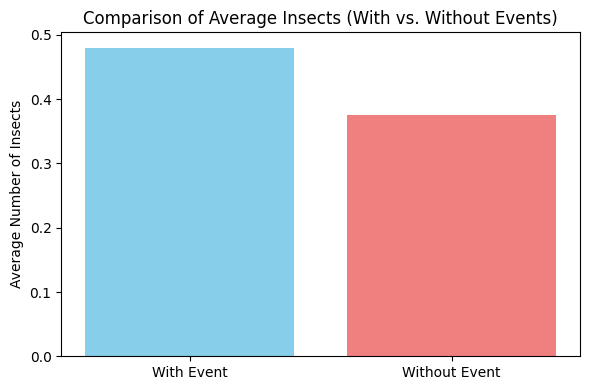

In [70]:
# 2. Compare average number of insects on days with vs. without events ---
has_event = Final_df[Final_df['Event'] != 0]['Number of Insects']
no_event = Final_df[Final_df['Event'] == 0]['Number of Insects']

avg_with_event = has_event.mean() if not has_event.empty else 0
avg_without_event = no_event.mean() if not no_event.empty else 0

print(f"\nAverage number of insects on days with events: {avg_with_event:.2f}")
print(f"Average number of insects on days without events: {avg_without_event:.2f}")

# Create a bar plot for comparison
event_categories = ['With Event', 'Without Event']
average_insects = [avg_with_event, avg_without_event]

plt.figure(figsize=(6, 4))
plt.bar(event_categories, average_insects, color=['skyblue', 'lightcoral'])
plt.ylabel("Average Number of Insects")
plt.title("Comparison of Average Insects (With vs. Without Events)")
plt.tight_layout()
plt.show()

In [76]:
# Group by 'Date' to get daily totals across all locations
daily_totals = Final_df.groupby('Date').agg(
    total_insects=('Number of Insects', 'sum'),
    total_catches=('New Catches', 'sum'),
    event=('Event', lambda x: 1 if any(val == 1 for val in x) else 0)
).reset_index()